# Introducing the next generation of InstaNovo models

## Announcing InstaNovo v1.1

Since our [InstaNovo paper](https://www.nature.com/articles/s42256-025-01019-5) is now published, we’d like to share an update on what we’ve been working on while our manuscript was under review. With the release of our preprint over a year ago, we were overwhelmed by the incredible response from the community and the applications of our models. We are actively collaborating with leading experts and continue to explore the potential of powerful solutions for de novo peptide sequencing. Our ongoing efforts focus on developing more accurate models, expanding the de novo sequencing ecosystem for analysis and data reporting, fine-tuning our models, and designing tailored, application-specific workflows.

While much of this work is still in progress, we have just released an improved version of our base model, InstaNovo v1.1. This model boasts higher recall, greater identification certainty, expanded support for modifications, and enhanced data processing and reporting features. We believe these advancements are worth communicating with this post instead of an article, and we are excited to show you how this model compares to the earlier model in our paper.

## Getting started

Our new model is available in the [main InstaNovo branch](https://github.com/instadeepai/InstaNovo/tree/main) with detailed documentation on installation, local execution, and running it in training or testing mode with your data. If you prefer a hosted solution, InstaDeep provides access to the model via our website, where you can upload your files and analyse up to 100,000 spectra per day on our servers (free for academic use). To reproduce the analysis in this blog post or to run this analysis on your own dataset, you can use this Jupyter notebook.

## Training data 

InstaNovo v1.1 (IN v1.1) has been trained on the [ProteomeTools](https://www.proteometools.org/), [MassiveKB](https://massive.ucsd.edu/ProteoSAFe/static/massive-kb-libraries.jsp), and kind dataset contributions from several other projects processed by the [CompOmics](https://www.compomics.com/) group at Ghent University. We are grateful for the huge community effort to generate, process, and curate the datasets that have enabled the development of our models. We are excited to contribute with the release of this combined dataset in the near future.

## Benchmarking IN v1.1

[IN v1.1](https://github.com/instadeepai/InstaNovo/releases/tag/1.1.0) is a substantial improvement over [IN v0.1](https://github.com/instadeepai/InstaNovo/releases/tag/0.1.4), the original model from our paper. To benchmark these models, we used a standard HeLa proteome run, a widely used reference sample in proteomics facilities for quality control and one of the validation datasets in our study.

In [12]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
import matplotlib.patches as mpatches

sns.set_theme('paper', 'ticks', 'colorblind', font_scale=1.5)

In [2]:
import warnings

# Suppress only FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
color_dict = {'old_knapsack': '#E2DBBE', 'new_knapsack': '#188FA7', 'new_greedy': '#9DBBAE', 'database': '#769FB6'}

In [9]:
!mkdir ./data

In [14]:
!python ../instanovo/scripts/get_zenodo_record.py --zenodo-url https://zenodo.org/api/records/15174703/files-archive --zip-path 15174703.zip --extract-path ./data

12,512,974/0 bytes ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0% • 2.0 MB/s • 0:00:00━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0% • ? • -:--:--
^C


In [13]:
final = pd.read_csv('./data/hela_preds.csv')
targets = pd.read_csv('./data/hela_targets.csv')

In [5]:
# merge final and target on scan_number
final = final.merge(targets, on='scan_number', how='left', suffixes=('_final', '_target'))

In [6]:
final.sample(5)

,id,targets,preds,log_probs,mod_preds,protein_id,protein_description,protein_start,scan_number,Checked,...,token_log_probs_new_greedy,delta_mass_ppm_new_greedy,mod_preds_new_greedy,protein_id_new_greedy,protein_description_new_greedy,protein_start_new_greedy,confidence_old_knapsack,confidence_new_knapsack,confidence_new_greedy,sequence
27844,controllerType=0 controllerNumber=1 scan=30498,NaN,WLNAFLFR,-18.140383,WLNAFLFR,NaN,NaN,NaN,30498,NaN,...,"[-15.604494094848633, -6.329813186312094e-05, ...",11257.327778,GTLNAFLYR,NaN,NaN,NaN,1.323524e-08,2.271454e-10,4.149745e-216,NaN
2832,controllerType=0 controllerNumber=1 scan=4235,NaN,HRLHTGEKPYECEECGK,-8.986145,HRLHTGEKPYECEECGK,NaN,NaN,NaN,4235,NaN,...,"[-5.356356620788574, -0.19363804161548615, -0....",1471.451322,GGPSPTGHEEDGEGT[UNIMOD:21]VS[UNIMOD:21]PKK,NaN,NaN,NaN,1.251315e-04,8.602998e-08,7.483694e-111,NaN
37432,controllerType=0 controllerNumber=1 scan=40565,NaN,SSSQSKPVEEEGGEPAPTEER,-15.856837,SSSQSKPVEEEGGEPAPTEER,NaN,NaN,NaN,40565,NaN,...,"[-2.322049379348755, -1.1960654258728027, -0.5...",7731.108584,ADDDDS[UNIMOD:21]DEDLNEHEEEKK,NaN,NaN,NaN,1.298563e-07,8.748022e-14,5.545865e-109,NaN
18972,controllerType=0 controllerNumber=1 scan=21182,NaN,NMSVHLSPCFR,-0.001750,NMSVHLSPCFR,sp|P62280|RS11_HUMAN,sp|P62280|RS11_HUMAN 40S ribosomal protein S11...,107,21182,False,...,"[-0.0024252308066934347, -7.962863310240209e-0...",1.208770,NMSVHLSPC[UNIMOD:4]FR,sp|P62280|RS11_HUMAN,sp|P62280|RS11_HUMAN 40S ribosomal protein S11...,107,9.982518e-01,9.948115e-01,9.948138e-01,NMSVHLSPC[UNIMOD:4]FR
29193,controllerType=0 controllerNumber=1 scan=31914,NaN,THLVAQGFLSALLSHPGLDSK,-7.711493,THLVAQGFLSALLSHPGLDSK,NaN,NaN,NaN,31914,False,...,"[-2.95634672511369e-05, -1.168244216387393e-05...",5932.227476,THIVDHHLELRPIPGLDSK,NaN,NaN,NaN,4.476526e-04,5.637901e-10,1.617980e-150,THIVSIPLRGC[UNIMOD:4]EVIPGLDSK


In [7]:
def normalise(string):
    string = string.replace("UNIMOD", "").replace("I", "L")
    return ''.join(re.findall(r'[A-Z]', string))


# get proteins from dataframe
def get_proteins(df, column):
    proteins = set()
    for ind in df.index:
        try:
            proteins.add(df.loc[ind, column].split(';')[0].split('|')[1])
        except:
            print(df.loc[ind, column], ind)
            pass
    return proteins

In [8]:
final['preds'] = final['preds'].replace(np.nan, '')
final['preds_new_knapsack'] = final['preds_new_knapsack'].replace(np.nan, '')
final['preds_new_greedy'] = final['preds_new_greedy'].replace(np.nan, '')
final['Sequence'] = final['Sequence'].replace(np.nan, '')
final['sequence'] = final['sequence'].replace(np.nan, '')

In [9]:
final['stripped_preds_old_knapsack'] = final['preds'].apply(normalise)
final['stripped_preds_new_knapsack'] = final['preds_new_knapsack'].apply(normalise)
final['stripped_preds_new_greedy'] = final['preds_new_greedy'].apply(normalise)
final['stripped_sequence'] = final['Sequence'].apply(normalise)
final['stripped_target'] = final['sequence'].apply(normalise)

In [10]:
final.sample(5)

,id,targets,preds,log_probs,mod_preds,protein_id,protein_description,protein_start,scan_number,Checked,...,protein_start_new_greedy,confidence_old_knapsack,confidence_new_knapsack,confidence_new_greedy,sequence,stripped_preds_old_knapsack,stripped_preds_new_knapsack,stripped_preds_new_greedy,stripped_sequence,stripped_target
34723,controllerType=0 controllerNumber=1 scan=37721,NaN,GPEEEPGEDKDLLYFEELSLER,-14.727730,GPEEEPGEDKDLLYFEELSLER,NaN,NaN,NaN,37721,NaN,...,NaN,4.016319e-07,7.422458e-05,3.615177e-08,,GPEEEPGEDKDLLYFEELSLER,VVSTDFDECDKLYFEELSLER,GKSTAVHEETEKLYFEELSLER,,
5047,controllerType=0 controllerNumber=1 scan=6561,NaN,FGVQSER,-0.118053,FGVQSER,sp|Q14247|SRC8_HUMAN,sp|Q14247|SRC8_HUMAN Src substrate cortactin O...,272,6561,False,...,272,8.886488e-01,9.899379e-01,9.899389e-01,FGVQSER,FGVQSER,FGVQSER,FGVQSER,FGVQSER,FGVQSER
1809,controllerType=0 controllerNumber=1 scan=3161,NaN,DGTFRPVEEK,-12.372132,DGTFRPVEEK,NaN,NaN,NaN,3161,NaN,...,NaN,4.234979e-06,8.893186e-08,1.247412e-176,,DGTFRPVEEK,CENLRVEEK,KENLRLEEK,,
18073,controllerType=0 controllerNumber=1 scan=20238,NaN,TLGSRLLTDGHLLQKPER,-13.132041,TLGSRLLTDGHLLQKPER,NaN,NaN,NaN,20238,NaN,...,NaN,1.980738e-06,7.640213e-09,2.042226e-154,,TLGSRLLTDGHLLQKPER,PGSALLLHRPLSRPHTPGK,TLTLVHREFRRLVTPGK,,
39471,controllerType=0 controllerNumber=1 scan=42706,NaN,HKLVPGGGGGGGGGGGGGGGGGGGGGGGGK,-36.206596,HKLVPGGGGGGGGGGGGGGGGGGGGGGGGK,NaN,NaN,NaN,42706,NaN,...,NaN,1.886579e-16,6.054168e-15,1.266900e-111,,HKLVPGGGGGGGGGGGGGGGGGGGGGGGGK,KKVLTHDHDHDHAEAAHE,DEDDEQEADEELLAEAHE,,


We use peptide-level metrics and especially recall to assess our models, the most direct evaluation of prediction performance. This is because bottom up proteomics is a peptide centric methodology; if the peptide is wrong, it does not matter what percentage of amino acids is wrong. Crucially, we evaluate whether the full prediction is correct.

The distribution of model confidence, defined as the product of our residue log probabilities raised in its natural exponent, indicates that the new model is sharper in its prediction certainty. We observe more high confidence predictions being correct, while lower confidence predictions are more densely clustered in the lower confidence range.

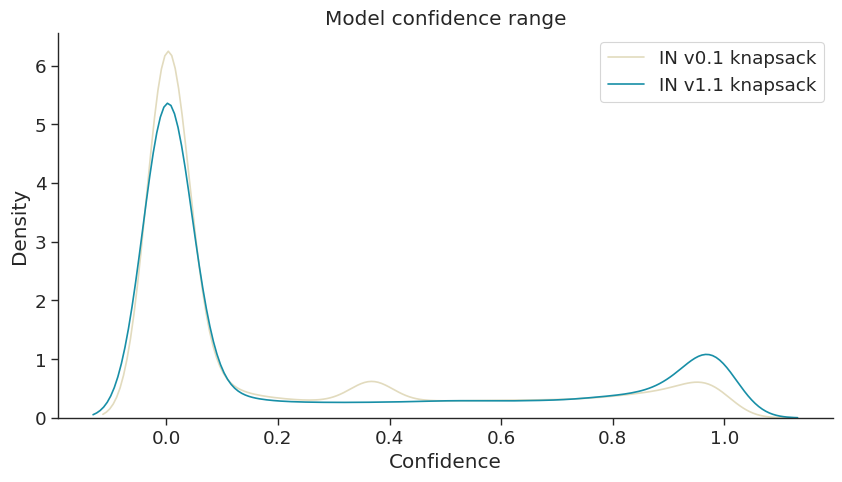

In [11]:
# let's start by plotting the confidence range as a kernel density plot for old and new knapsack
plt.figure(figsize=(10, 5))
sns.kdeplot(final['confidence_old_knapsack'], color=color_dict['old_knapsack'], label='Old Knapsack')
sns.kdeplot(final['confidence_new_knapsack'], color=color_dict['new_knapsack'], label='New Knapsack')
plt.xlabel('Confidence')
plt.ylabel('Density')
plt.legend(['IN v0.1 knapsack', 'IN v1.1 knapsack'], loc='upper right')
plt.title('Model confidence range')
sns.despine()
plt.show()

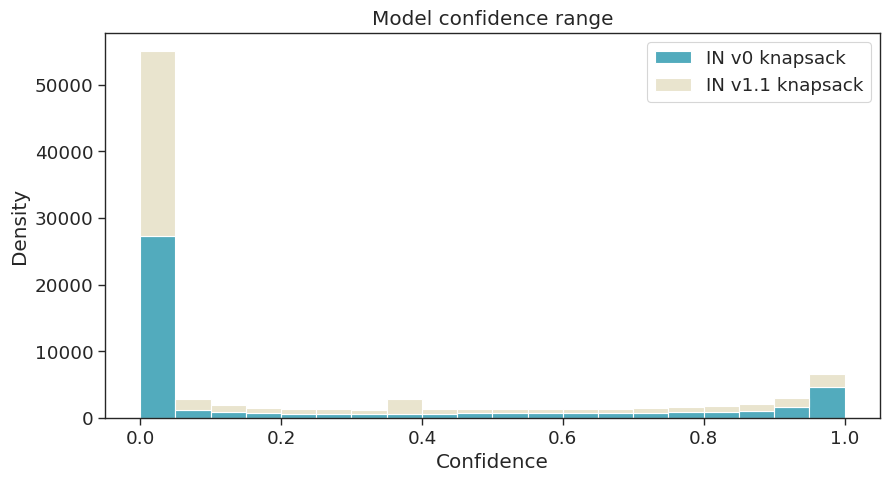

In [12]:
# let's do a stacked bar plot instead
plt.figure(figsize=(10, 5))
sns.histplot(final[['confidence_old_knapsack', 'confidence_new_knapsack']], bins=20, kde=False, multiple='stack', palette=[color_dict['old_knapsack'], color_dict['new_knapsack']])
plt.xlabel('Confidence')
plt.ylabel('Density')
plt.legend(['IN v0 knapsack', 'IN v1.1 knapsack', 'IN 1.1 greedy'])
plt.title('Model confidence range')
plt.show()

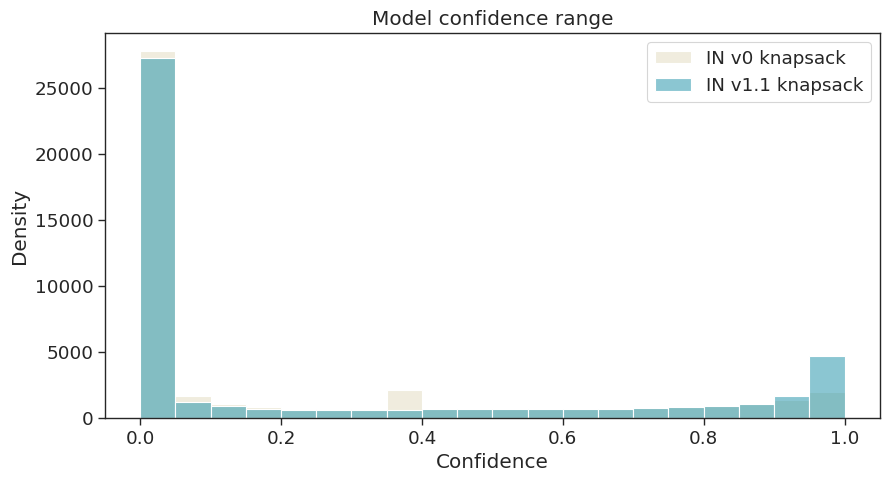

In [13]:
# let's do overlaid histograms instead
plt.figure(figsize=(10, 5))
sns.histplot(final['confidence_old_knapsack'], bins=20, kde=False, color=color_dict['old_knapsack'], alpha=0.5, label='Old Knapsack')
sns.histplot(final['confidence_new_knapsack'], bins=20, kde=False, color=color_dict['new_knapsack'], alpha=0.5, label='New Knapsack')
plt.xlabel('Confidence')
plt.ylabel('Density')
plt.legend(['IN v0 knapsack', 'IN v1.1 knapsack', 'IN 1.1 greedy'])
plt.title('Model confidence range')
plt.show()

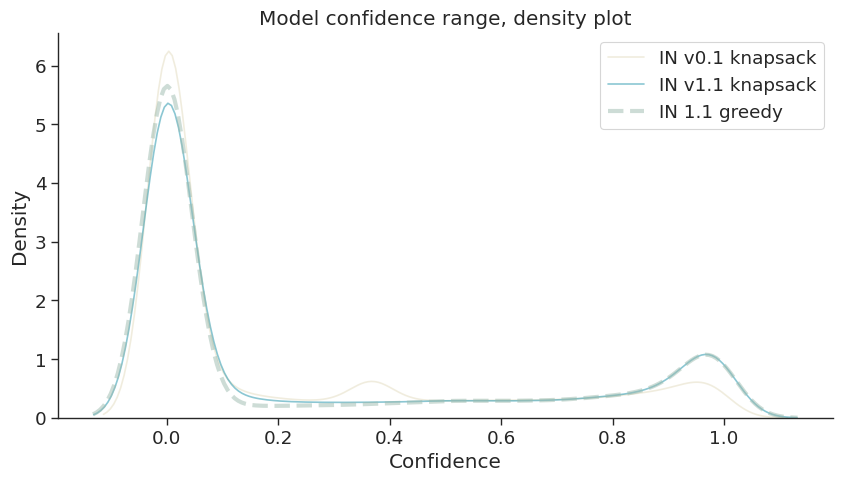

In [14]:
# let's do all three now with kde
plt.figure(figsize=(10, 5))
sns.kdeplot(final['confidence_old_knapsack'], color=color_dict['old_knapsack'], label='Old Knapsack', alpha=0.5)
sns.kdeplot(final['confidence_new_knapsack'], color=color_dict['new_knapsack'], label='New Knapsack', alpha=0.5)
sns.kdeplot(final['confidence_new_greedy'], color=color_dict['new_greedy'], label='New Greedy', alpha=0.5, linestyle='--', linewidth=3)
plt.xlabel('Confidence')
plt.ylabel('Density')
plt.legend()
plt.title('Model confidence range, density plot')
plt.legend(['IN v0.1 knapsack', 'IN v1.1 knapsack', 'IN 1.1 greedy'])
sns.despine()
plt.show()

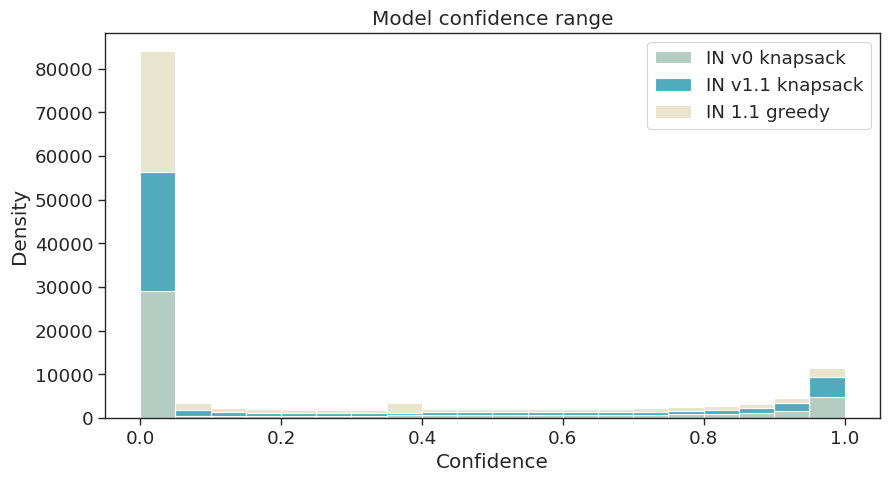

In [15]:
# all three with stacked bar plot
plt.figure(figsize=(10, 5))
sns.histplot(final[['confidence_old_knapsack', 'confidence_new_knapsack', 'confidence_new_greedy']], bins=20, kde=False, multiple='stack', palette=[color_dict['old_knapsack'], color_dict['new_knapsack'], color_dict['new_greedy']])
plt.xlabel('Confidence')
plt.ylabel('Density')
plt.title('Model confidence range')
plt.legend(['IN v0 knapsack', 'IN v1.1 knapsack', 'IN 1.1 greedy'])
plt.show()

### Recall

In [16]:
# restrict analysis to rows with annotated database results. Let's use the Confidence column for this, need to remove NA values
final_db = final[final['stripped_target'] != '']
final_db

,id,targets,preds,log_probs,mod_preds,protein_id,protein_description,protein_start,scan_number,Checked,...,protein_start_new_greedy,confidence_old_knapsack,confidence_new_knapsack,confidence_new_greedy,sequence,stripped_preds_old_knapsack,stripped_preds_new_knapsack,stripped_preds_new_greedy,stripped_sequence,stripped_target
26,controllerType=0 controllerNumber=1 scan=1285,NaN,GSYSHGSSEVSLKK,-5.930367,GSYSHGSSEVSLKK,NaN,NaN,NaN,1285,False,...,NaN,2.657505e-03,2.404439e-01,2.403566e-01,EESGKPGAHVTVKK,GSYSHGSSEVSLKK,EESGKPGAHVSLKK,EESGKPGAHVSLKK,EESGKPGAHVTVKK,EESGKPGAHVTVKK
34,controllerType=0 controllerNumber=1 scan=1294,NaN,FHTVDGHQCEVRK,-14.253912,FHTVDGHQCEVRK,NaN,NaN,NaN,1294,False,...,NaN,6.450668e-07,2.308397e-01,9.069458e-153,YHTVNGHNC[UNIMOD:4]EVRK,FHTVDGHQCEVRK,YHTVNGHNCEVRK,GVHTVNGHNCEVRK,YHTVNGHNCEVRK,YHTVNGHNCEVRK
35,controllerType=0 controllerNumber=1 scan=1295,NaN,APGTPHSHTKPYVR,-0.063392,APGTPHSHTKPYVR,sp|Q07020|RL18_HUMAN,sp|Q07020|RL18_HUMAN 60S ribosomal protein L18...,154,1295,False,...,154,9.385759e-01,9.168807e-01,9.163108e-01,APGTPHSHTKPYVR,APGTPHSHTKPYVR,APGTPHSHTKPYVR,APGTPHSHTKPYVR,APGTPHSHTKPYVR,APGTPHSHTKPYVR
38,controllerType=0 controllerNumber=1 scan=1298,NaN,APRRTEEPEGLRK,-3.959933,APRRTEEPEGLRK,NaN,NaN,NaN,1298,False,...,NaN,1.906439e-02,2.496853e-03,1.110096e-180,SRERPSQPEGLRK,APRRTEEPEGLRK,GSRRPGTEPEGLRK,ERRPGSEPEGLRK,SRERPSQPEGLRK,SRERPSQPEGLRK
40,controllerType=0 controllerNumber=1 scan=1300,NaN,RNPAPYSRPK,-0.018774,RNPAPYSRPK,NaN,NaN,NaN,1300,False,...,71,9.814011e-01,9.946527e-01,9.946172e-01,NRPAPYSRPK,RNPAPYSRPK,NRPAPYSRPK,NRPAPYSRPK,NRPAPYSRPK,NRPAPYSRPK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46301,controllerType=0 controllerNumber=1 scan=50066,NaN,TFLHGAPGPSDFGLDLDFK,-15.324485,TFLHGAPGPSDFGLDLDFK,NaN,NaN,NaN,50066,False,...,NaN,2.211367e-07,7.865379e-05,2.798440e-109,LKLEAELGNMQGLVEDFK,TFLHGAPGPSDFGLDLDFK,LKLEAELGNMQGLVEDFK,GVPPVSEDPPVFAVLDDFK,LKLEAELGNMQGLVEDFK,LKLEAELGNMQGLVEDFK
46302,controllerType=0 controllerNumber=1 scan=50068,NaN,CAPGPPPPPPGPGPPGPPGPGPPGPPGPGPR,-34.697361,CAPGPPPPPPGPGPPGPPGPGPPGPPGPGPR,NaN,NaN,NaN,50068,False,...,NaN,8.533508e-16,6.407818e-12,7.743599e-99,AYHEQLTVAEITNAC[UNIMOD:4]FEPANQMVK,CAPGPPPPPPGPGPPGPPGPGPPGPPGPGPR,VLSEEEAAKEEKEESDDEAAVEEAK,AELEEQLEALEEALEEAVAELEEK,AYHEQLTVAELTNACFEPANQMVK,AYHEQLTVAELTNACFEPANQMVK
46312,controllerType=0 controllerNumber=1 scan=50084,NaN,LTSSGYRPSPNVVSVVSCLER,-13.725790,LTSSGYRPSPNVVSVVSCLER,NaN,NaN,NaN,50084,False,...,NaN,1.093869e-06,2.103169e-10,8.898064e-96,LTGMAFRVPTANVSVVDLTC[UNIMOD:4]R,LTSSGYRPSPNVVSVVSCLER,AVSVVHSVVGHSVVSVVSNSGSGR,VVVSVVKVDHSVVSVVSGNSSGR,LTGMAFRVPTANVSVVDLTCR,LTGMAFRVPTANVSVVDLTCR
46359,controllerType=0 controllerNumber=1 scan=50185,NaN,ALLHSSSSSSSSSSSSSSSSSSSLLSQLLSR,-49.991119,ALLHSSSSSSSSSSSSSSSSSSSLLSQLLSR,NaN,NaN,NaN,50185,False,...,NaN,1.945955e-22,1.001094e-10,3.247733e-72,TATESFASDPILYRPVAVALDTKGPEIR,ALLHSSSSSSSSSSSSSSSSSSSLLSQLLSR,STAAETGFTFLSPEHTLVDTFLDGFSVK,GTASFATAATAAHNPNTTAVVHLVWELKK,TATESFASDPLLYRPVAVALDTKGPELR,TATESFASDPLLYRPVAVALDTKGPELR


In [17]:
# Compute recall for old knapsack. Check columns 'preds' and 'Sequence' for exact match. Recall would be number of exact matches divided by total number of rows
recall_old_knapsack = (final_db['stripped_preds_old_knapsack'] == final_db['stripped_target']).sum() / final_db.shape[0]
print(f'Recall for old knapsack: {recall_old_knapsack:.4f}')

# do the same for new knapsack
recall_new_knapsack = (final_db['stripped_preds_new_knapsack'] == final_db['stripped_target']).sum() / final_db.shape[0]
print(f'Recall for new knapsack: {recall_new_knapsack:.4f}')

# and for new greedy
recall_new_greedy = (final_db['stripped_preds_new_greedy'] == final_db['stripped_target']).sum() / final_db.shape[0]
print(f'Recall for new greedy: {recall_new_greedy:.4f}')

Recall for old knapsack: 0.4945
Recall for new knapsack: 0.6302
Recall for new greedy: 0.5665


Compared to the gold standard database search, IN v0.1 achieved a recall of 49.5%. IN v1.1, using greedy precursor mass fit search (i.e. selecting the sequence that best fits the observed precursor mass), improves recall to 56.7%, while knapsack beam search further boosts recall to 63%. This compounds to a 13.5% improvement over the previous model, with more than six out of ten peptides being detected without precursor mass filtering on predictions.

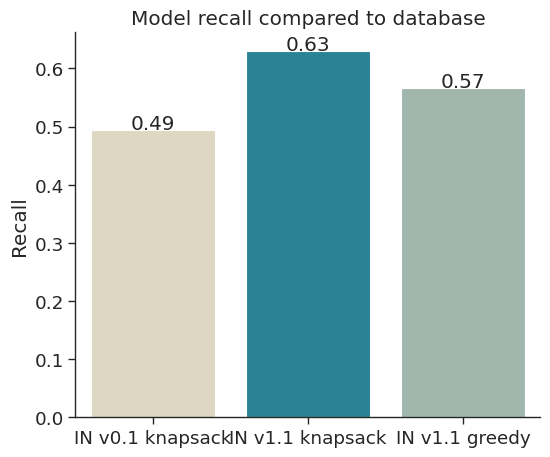

In [18]:
# plot bar plot for recall, old knapsack, new knapsack, new greedy
plt.figure(figsize=(6, 5))
sns.barplot(x=['IN v0.1 knapsack', 'IN v1.1 knapsack', 'IN v1.1 greedy'], y=[recall_old_knapsack, recall_new_knapsack, recall_new_greedy], palette=[color_dict['old_knapsack'], color_dict['new_knapsack'], color_dict['new_greedy']])
plt.ylabel('Recall')
# put numbers on top of bars
for i, v in enumerate([recall_old_knapsack, recall_new_knapsack, recall_new_greedy]):
    plt.text(i, v + 0.0005, f'{v:.2f}', ha='center')
plt.title('Model recall compared to database')
sns.despine()
plt.show()

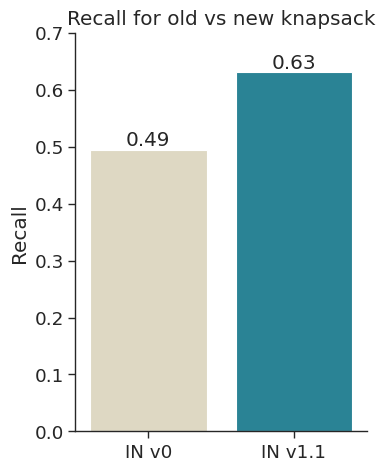

In [19]:
# plot bar plot for recall, old knapsack and new knapsack
plt.figure(figsize=(4, 5))
sns.barplot(x=['IN v0', 'IN v1.1'], y=[recall_old_knapsack, recall_new_knapsack], palette=[color_dict['old_knapsack'], color_dict['new_knapsack']])
plt.ylabel('Recall')
# put numbers on top of bars
for i, v in enumerate([recall_old_knapsack, recall_new_knapsack]):
    plt.text(i, v + 0.0005, f'{v:.2f}', ha='center', va='bottom')

# adjust space between plot and title
plt.subplots_adjust(top=0.9)
plt.title('Recall for old vs new knapsack')
plt.ylim(0, 0.7)
sns.despine()
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [20]:
# compute precision vs recall curve for old knapsack
precision_old_knapsack = []
recall_old_knapsack = []
confidence_old_knapsack = []

for threshold in np.linspace(0, 1, 100):
    tp = ((final_db['confidence_old_knapsack'] > threshold) & (final_db['stripped_preds_old_knapsack'] == final_db['stripped_target'])).sum()
    fp = ((final_db['confidence_old_knapsack'] > threshold) & (final_db['stripped_preds_old_knapsack'] != final_db['stripped_target'])).sum()
    fn = ((final_db['confidence_old_knapsack'] <= threshold) & (final_db['stripped_preds_old_knapsack'] == final_db['stripped_target'])).sum()
    precision_old_knapsack.append(tp / (tp + fp))
    recall_old_knapsack.append(tp / (tp + fn))
    confidence_old_knapsack.append(threshold)


/tmp/ipykernel_97698/940863185.py:10: RuntimeWarning: invalid value encountered in scalar divide
  precision_old_knapsack.append(tp / (tp + fp))


In [21]:
# compute precision vs recall curve for new knapsack
precision_new_knapsack = []
recall_new_knapsack = []
confidence_new_knapsack = []

for threshold in np.linspace(0, 1, 100):
    tp = ((final_db['confidence_new_knapsack'] > threshold) & (final_db['stripped_preds_new_knapsack'] == final_db['stripped_target'])).sum()
    fp = ((final_db['confidence_new_knapsack'] > threshold) & (final_db['stripped_preds_new_knapsack'] != final_db['stripped_target'])).sum()
    fn = ((final_db['confidence_new_knapsack'] <= threshold) & (final_db['stripped_preds_new_knapsack'] == final_db['stripped_target'])).sum()
    precision_new_knapsack.append(tp / (tp + fp))
    recall_new_knapsack.append(tp / (tp + fn))
    confidence_new_knapsack.append(threshold)

/tmp/ipykernel_97698/225920749.py:10: RuntimeWarning: invalid value encountered in scalar divide
  precision_new_knapsack.append(tp / (tp + fp))


In [22]:
# compute precision vs recall curve for new greedy
precision_new_greedy = []
recall_new_greedy = []
confidence_new_greedy = []

for threshold in np.linspace(0, 1, 100):
    tp = ((final_db['confidence_new_greedy'] > threshold) & (final_db['stripped_preds_new_greedy'] == final_db['stripped_target'])).sum()
    fp = ((final_db['confidence_new_greedy'] > threshold) & (final_db['stripped_preds_new_greedy'] != final_db['stripped_target'])).sum()
    fn = ((final_db['confidence_new_greedy'] <= threshold) & (final_db['stripped_preds_new_greedy'] == final_db['stripped_target'])).sum()
    precision_new_greedy.append(tp / (tp + fp))
    recall_new_greedy.append(tp / (tp + fn))
    confidence_new_greedy.append(threshold)

/tmp/ipykernel_97698/1223235880.py:10: RuntimeWarning: invalid value encountered in scalar divide
  precision_new_greedy.append(tp / (tp + fp))


We observe better precision values in parallel with increased coverage 

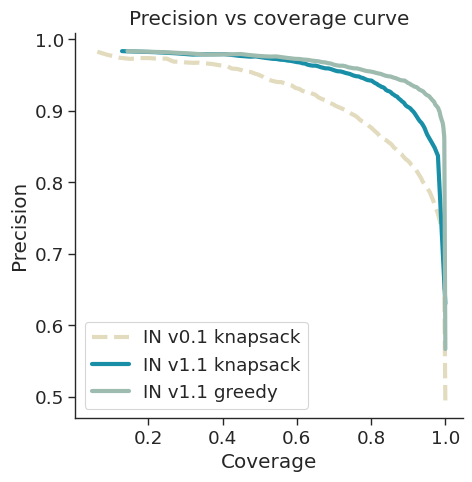

In [23]:
# plot precision vs recall curve for old knapsack, new knapsack, new greedy
plt.figure(figsize=(5, 5))
plt.plot(recall_old_knapsack, precision_old_knapsack, label='IN v0.1 knapsack', color=color_dict['old_knapsack'], linewidth=3, linestyle='--')  
plt.plot(recall_new_knapsack, precision_new_knapsack, label='IN v1.1 knapsack', color=color_dict['new_knapsack'], linewidth=3)
plt.plot(recall_new_greedy, precision_new_greedy, label='IN v1.1 greedy', color=color_dict['new_greedy'], linewidth=3)

plt.xlabel('Coverage')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision vs coverage curve')
sns.despine()
plt.show()

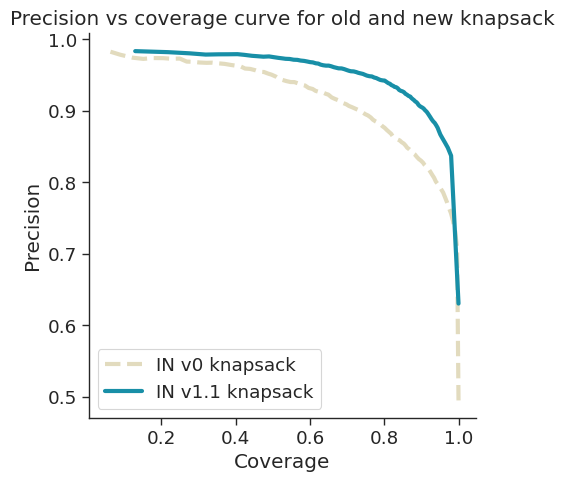

In [24]:
# plot precision vs recall curve for old knapsack, new knapsack
plt.figure(figsize=(5, 5))
plt.plot(recall_old_knapsack, precision_old_knapsack, label='IN v0 knapsack', color=color_dict['old_knapsack'], linewidth=3, linestyle='--')
plt.plot(recall_new_knapsack, precision_new_knapsack, label='IN v1.1 knapsack', color=color_dict['new_knapsack'], linewidth=3)

plt.xlabel('Coverage')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision vs coverage curve for old and new knapsack')
sns.despine()
plt.show()

In [25]:
# calculate confidence threshold for 95% precision for old knapsack, new knapsack, new greedy
confidence_threshold_old_knapsack = confidence_old_knapsack[np.argmax(np.array(precision_old_knapsack) >= 0.95)]
print(f'Old Knapsack: {confidence_threshold_old_knapsack:.2f}')

confidence_threshold_new_knapsack = confidence_new_knapsack[np.argmax(np.array(precision_new_knapsack) >= 0.95)]
print(f'New Knapsack: {confidence_threshold_new_knapsack:.2f}')

confidence_threshold_new_greedy = confidence_new_greedy[np.argmax(np.array(precision_new_greedy) >= 0.95)]
print(f'New Greedy: {confidence_threshold_new_greedy:.2f}')

Old Knapsack: 0.75
New Knapsack: 0.55
New Greedy: 0.55


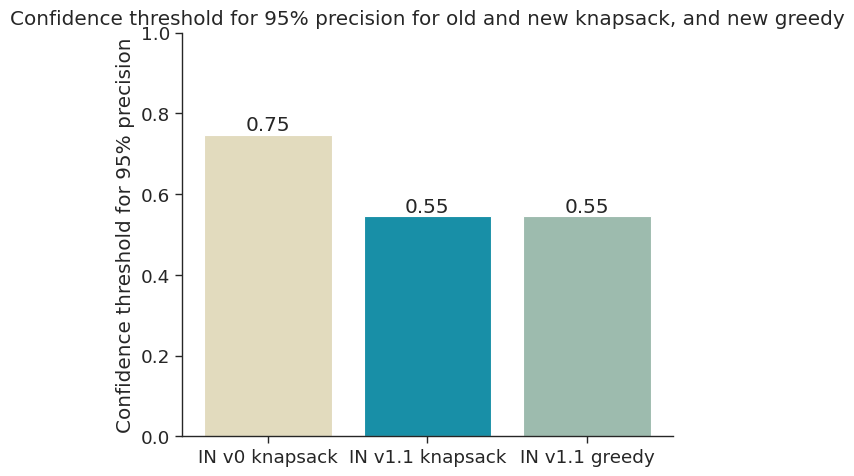

In [26]:
# plot confidence threshold for 95% precision for old knapsack, new knapsack, new greedy
plt.figure(figsize=(6, 5))
plt.bar(['IN v0 knapsack', 'IN v1.1 knapsack', 'IN v1.1 greedy'], [confidence_threshold_old_knapsack, confidence_threshold_new_knapsack, confidence_threshold_new_greedy], color=[color_dict['old_knapsack'], color_dict['new_knapsack'], color_dict['new_greedy']])
plt.ylabel('Confidence threshold for 95% precision')
plt.title('Confidence threshold for 95% precision for old and new knapsack, and new greedy')
# plot numbers on top of bars
for i, v in enumerate([confidence_threshold_old_knapsack, confidence_threshold_new_knapsack, confidence_threshold_new_greedy]):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center')
    
plt.ylim(0, 1)
plt.tight_layout()
sns.despine()
plt.show()

While it is still unclear whether this trend will persist with larger training datasets and increasing model sizes, this pattern suggests that confidence-based thresholding can help reduce false positive rates.

We use this precision to estimate the false discovery rate (FDR) and derive confidence cutoffs for low false identifications, which yield identification results aligned with conventional proteomics search outputs. In agreement with our confidence analysis, we observe that lower confidence thresholds are required to maintain a 5% FDR.

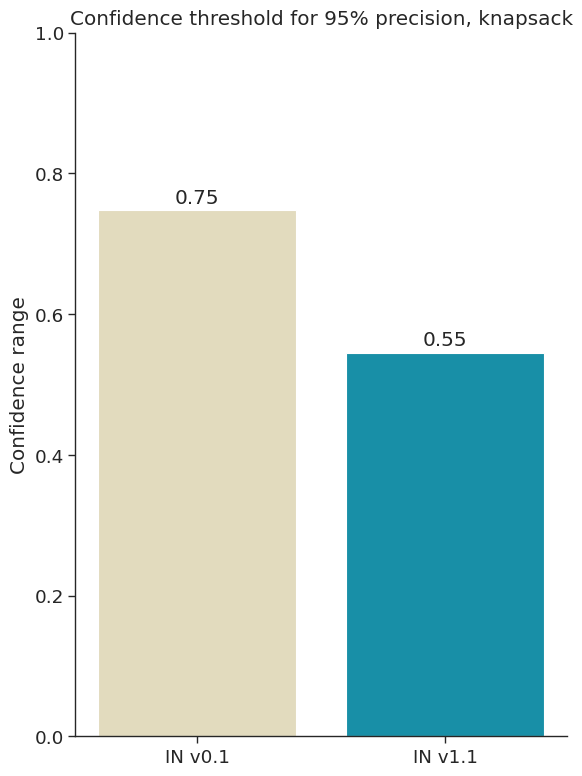

In [27]:
# same plot but only for old and new knapsack
plt.figure(figsize=(6, 8))
plt.bar(['IN v0.1', 'IN v1.1'], [confidence_threshold_old_knapsack, confidence_threshold_new_knapsack], color=[color_dict['old_knapsack'], color_dict['new_knapsack']])
plt.ylabel('Confidence range')
plt.title('Confidence threshold for 95% precision, knapsack')
# plot numbers on top of bars
for i, v in enumerate([confidence_threshold_old_knapsack, confidence_threshold_new_knapsack]):
    plt.text(i, v + 0.005, f'{v:.2f}', ha='center', va='bottom')
plt.ylim(0, 1)
plt.tight_layout()
sns.despine()

In [28]:
# plot barplot of new PSMs at 5% FDR
old_ks = final[final['confidence_old_knapsack'] >= confidence_threshold_old_knapsack].shape[0]
print(f'Old Knapsack: {old_ks} PSMs at 5% FDR')

new_ks = final[final['confidence_new_knapsack'] >= confidence_threshold_new_knapsack].shape[0]
print(f'New Knapsack: {new_ks} PSMs at 5% FDR')

new_greedy = final[final['confidence_new_greedy'] >= confidence_threshold_new_greedy].shape[0]
print(f'New Greedy: {new_greedy} PSMs at 5% FDR')

Old Knapsack: 6051 PSMs at 5% FDR
New Knapsack: 12012 PSMs at 5% FDR
New Greedy: 12035 PSMs at 5% FDR


In [29]:
# find new PSMs at 5% FDR, i.e. not in the database. Use the Confidence column for this
new_ks_fdr = final[(final['confidence_new_knapsack'] >= confidence_threshold_new_knapsack) & (final['stripped_target'] == '')].shape[0]
print(f'New Knapsack: {new_ks_fdr} new PSMs at 5% FDR')

new_greedy_fdr = final[(final['confidence_new_greedy'] >= confidence_threshold_new_greedy) & (final['stripped_target'] == '')].shape[0]
print(f'New Greedy: {new_greedy_fdr} new PSMs at 5% FDR')

old_ks_fdr = final[(final['confidence_old_knapsack'] >= confidence_threshold_old_knapsack) & (final['stripped_target'] == '')].shape[0]
print(f'Old Knapsack: {old_ks_fdr} new PSMs at 5% FDR')

New Knapsack: 3250 new PSMs at 5% FDR
New Greedy: 3272 new PSMs at 5% FDR
Old Knapsack: 1487 new PSMs at 5% FDR


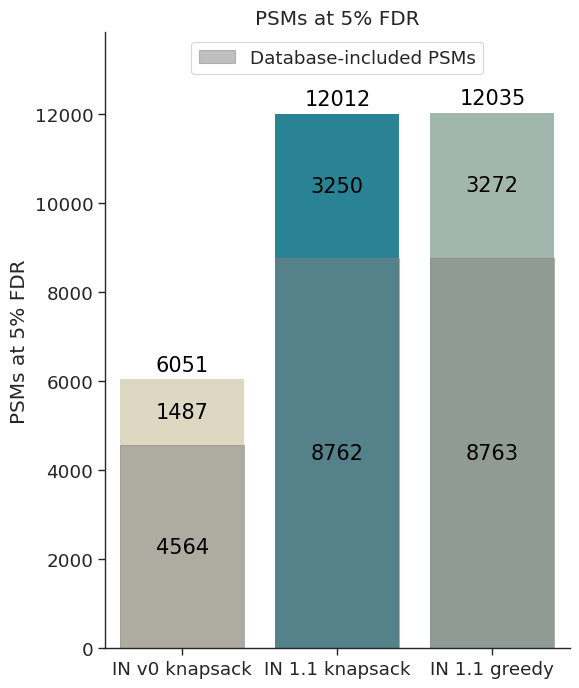

In [30]:
categories = ['IN v0 knapsack', 'IN 1.1 knapsack', 'IN 1.1 greedy']
values = [old_ks, new_ks, new_greedy]  # Total PSMs
shading_values = [old_ks - old_ks_fdr, new_ks - new_ks_fdr, new_greedy - new_greedy_fdr]  # Shaded portion (Database-included PSMs)
unshaded_values = [old_ks_fdr, new_ks_fdr, new_greedy_fdr]  # Unshaded portion (FDR-controlled PSMs)
colors = [color_dict['old_knapsack'], color_dict['new_knapsack'], color_dict['new_greedy']]

# Create bar plot
plt.figure(figsize=(6, 8))
ax = sns.barplot(x=categories, y=values, palette=colors, edgecolor="none")  # Remove default bar edges

# Overlay shading at the bottom of each bar
bar_width = 0.8  # Width of bars
alpha = 0.5  # Transparency level for shading
for i, (v, sv, uv) in enumerate(zip(values, shading_values, unshaded_values, strict=True)):
    # Shaded portion (Database-included PSMs)
    plt.gca().add_patch(plt.Rectangle(
        (i - bar_width / 2, 0),  # Bottom-left corner
        bar_width,  # Width
        sv,  # Height
        color='gray', alpha=alpha, label="Database-included PSMs" if i == 0 else ""  # Only add label once
    ))

    # Add text labels inside the bars
    plt.text(i, sv / 2, f'{sv}', ha='center', va='center', fontsize=15, color='black')  # Center of shaded portion
    plt.text(i, sv + (uv / 2), f'{uv}', ha='center', va='center', fontsize=15, color='black')  # Center of unshaded portion
    plt.text(i, v + 100, f'{v}', ha='center', va='bottom', fontsize=15, color='black')  # Top of bar

# Formatting
plt.ylabel('PSMs at 5% FDR')
plt.title('PSMs at 5% FDR')
plt.ylim(0, max(values) * 1.15)  # Adjust y-limit to fit labels
sns.despine()

# Add legend for shading, positioned to the right with a box
plt.legend(loc='upper center', frameon=True)

plt.show()


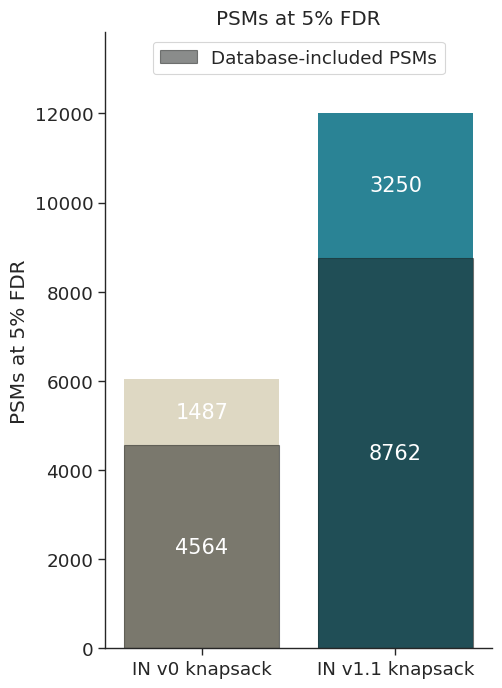

In [31]:
# create the same plot without greedy
categories = ['IN v0 knapsack', 'IN v1.1 knapsack']
values = [old_ks, new_ks]  # Total PSMs
shading_values = [old_ks - old_ks_fdr, new_ks - new_ks_fdr]  # Shaded portion (Database-included PSMs)
unshaded_values = [old_ks_fdr, new_ks_fdr]  # Unshaded portion (FDR-controlled PSMs)
colors = [color_dict['old_knapsack'], color_dict['new_knapsack']]

# Create bar plot
plt.figure(figsize=(5, 8))
ax = sns.barplot(x=categories, y=values, palette=colors, edgecolor="none")  # Remove default bar edges

# Overlay shading at the bottom of each bar
bar_width = 0.8  # Width of bars
alpha = 0.5  # Transparency level for shading

for i, (v, sv, uv) in enumerate(zip(values, shading_values, unshaded_values, strict=True)):
    # Shaded portion (Database-included PSMs)
    plt.gca().add_patch(plt.Rectangle(
        (i - bar_width / 2, 0),  # Bottom-left corner
        bar_width,  # Width
        sv,  # Height
        color='#171a18', alpha=alpha, label="Database-included PSMs" if i == 0 else ""  # Only add label once
    ))
    
    # Add text labels inside the bars
    plt.text(i, sv / 2, f'{sv}', ha='center', va='center', fontsize=15, color='white')  # Center of shaded portion
    plt.text(i, sv + (uv / 2), f'{uv}', ha='center', va='center', fontsize=15, color='white')  # Center of unshaded portion
    plt.text(i, v + 100, f'{v}', ha='center', va='bottom', fontsize=15, color='white')  # Top of bar

# Formatting
plt.ylabel('PSMs at 5% FDR')
plt.title('PSMs at 5% FDR')
plt.ylim(0, max(values) * 1.15)  # Adjust y-limit to fit labels
sns.despine()

# Add legend for shading, positioned to the right with a box
plt.legend(loc='upper center', frameon=True)
plt.show()

At the same threshold, IN v1.1 identifies more novel PSMs compared to its predecessor 

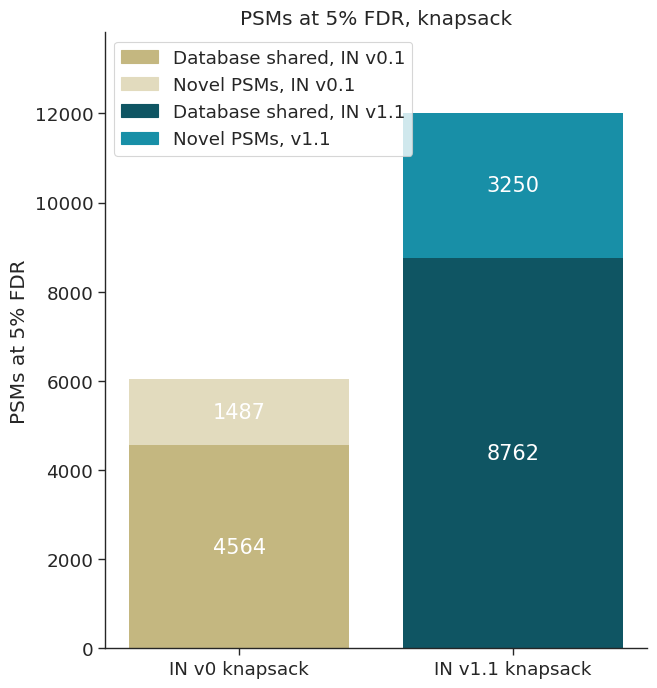

In [32]:
# create the same plot without greedy
categories = ['IN v0 knapsack', 'IN v1.1 knapsack']
values = [old_ks, new_ks]  # Total PSMs
target_values = [old_ks - old_ks_fdr, new_ks - new_ks_fdr]  # Shaded portion (Database-included PSMs)
new_values = [old_ks_fdr, new_ks_fdr]  # Unshaded portion (FDR-controlled PSMs)
colors = ['#c4b780', '#0f5563', color_dict['old_knapsack'], color_dict['new_knapsack']]

# Create stacked bar plot with new values on top of target values for each category
plt.figure(figsize=(7, 8))
plt.bar(categories, target_values, color=colors[0:2], edgecolor="none", label="Database-included PSMs")

plt.bar(categories, new_values, color=colors[2:], edgecolor="none", label="New PSMs", bottom=target_values)

# Add text labels inside the bars
for i, (nv, tv) in enumerate(zip(new_values, target_values, strict=True)):
    plt.text(i, tv / 2, f'{tv}', ha='center', va='center', fontsize=15, color='white')  # Center of target portion
    plt.text(i, tv + (nv / 2), f'{nv}', ha='center', va='center', fontsize=15, color='white')  # Center of new portion

# Formatting
plt.ylabel('PSMs at 5% FDR')
plt.title('PSMs at 5% FDR, knapsack')

# add all 4 labels and colors to legend
# Add custom legend
legend_patches = [
    mpatches.Patch(color='#c4b780', label='Database shared, IN v0.1'),
    mpatches.Patch(color=color_dict['old_knapsack'], label='Novel PSMs, IN v0.1'),
    mpatches.Patch(color='#0f5563', label='Database shared, IN v1.1'),
    mpatches.Patch(color=color_dict['new_knapsack'], label='Novel PSMs, v1.1')
]

plt.legend(handles=legend_patches, loc='upper left', frameon=True)

plt.ylim(0, max(values) * 1.15)  # Adjust y-limit to fit labels
sns.despine()
plt.show()

### Mapping to proteome

IN v1.1 predicts 42.6% more Peptide Spectrum Matches (PSMs) that map to the proteome with exact sequence matching

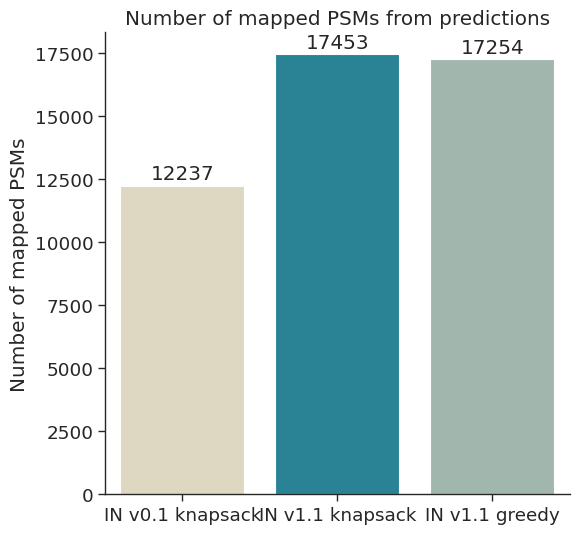

In [33]:
# plot number of mapped PSMs for old and new predictions
plt.figure(figsize=(6, 6))
psms_old_knapsack = len(final[final.protein_id.notna()])
psms_new_knapsack = len(final[final.protein_id_new_knapsack.notna()])
psms_new_greedy = len(final[final.protein_id_new_greedy.notna()])

sns.barplot(x=['IN v0.1 knapsack', 'IN v1.1 knapsack', 'IN v1.1 greedy'], y=[psms_old_knapsack, psms_new_knapsack, psms_new_greedy], palette=[color_dict['old_knapsack'], color_dict['new_knapsack'], color_dict['new_greedy']])
plt.ylabel('Number of mapped PSMs')
plt.ylim(max(0, min(0, max(psms_old_knapsack, psms_new_knapsack, psms_new_greedy) * 1.2)))
# put numbers on top of bars
for i, v in enumerate([psms_old_knapsack, psms_new_knapsack, psms_new_greedy]):
    plt.text(i, v + 100, f'{v}', ha='center', va='bottom')
plt.title('Number of mapped PSMs from predictions')
sns.despine()

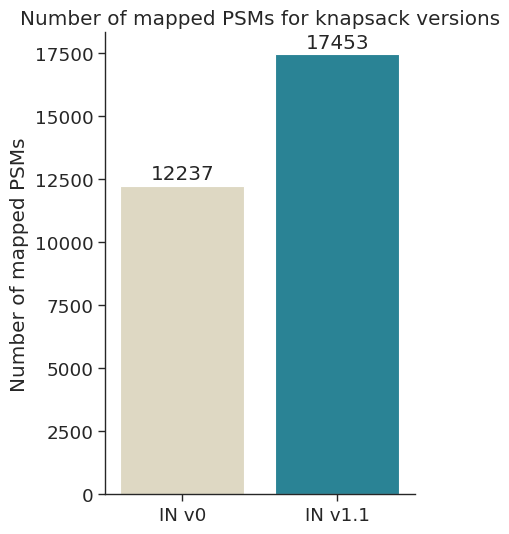

In [34]:
# same plot without greedy
plt.figure(figsize=(4, 6))
psms_old_knapsack = len(final[final.protein_id.notna()])
psms_new_knapsack = len(final[final.protein_id_new_knapsack.notna()])

sns.barplot(x=['IN v0', 'IN v1.1'], y=[psms_old_knapsack, psms_new_knapsack], palette=[color_dict['old_knapsack'], color_dict['new_knapsack']])
plt.ylabel('Number of mapped PSMs')
plt.ylim(max(0, min(0, max(psms_old_knapsack, psms_new_knapsack) * 1.2)))
# put numbers on top of bars
for i, v in enumerate([psms_old_knapsack, psms_new_knapsack]):
    plt.text(i, v + 100, f'{v}', ha='center', va='bottom')
plt.title('Number of mapped PSMs for knapsack versions')
sns.despine()
plt.show()

In [35]:
# get mapped numbers for new and old predictions and plot the for different confidence thresholds
confidence_thresholds = np.linspace(0, 1, 50)
mapped_old_knap = []
mapped_new_knap = []
mapped_new_greedy = []

for threshold in confidence_thresholds:
    matched_old_knapsack = final[(final["confidence_old_knapsack"] > threshold) & (final.protein_id.notna())]
    matched_new_knapsack = final[(final["confidence_new_knapsack"] > threshold) & (final.protein_id_new_knapsack.notna())]
    matched_new_greedy = final[(final["confidence_new_greedy"] > threshold) & (final.protein_id_new_greedy.notna())]

    mapped_old_knap.append(matched_old_knapsack.shape[0])
    mapped_new_knap.append(matched_new_knapsack.shape[0])
    mapped_new_greedy.append(matched_new_greedy.shape[0])

Text(0.5, 1.0, 'Mapped PSMs for different confidence thresholds')

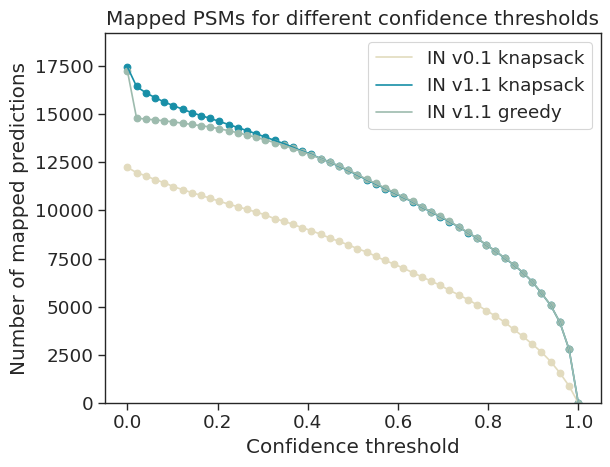

In [36]:
plt.plot(confidence_thresholds, mapped_old_knap, label='IN v0.1 knapsack', color=color_dict['old_knapsack'])
plt.plot(confidence_thresholds, mapped_new_knap, label='IN v1.1 knapsack', color=color_dict['new_knapsack'])
plt.plot(confidence_thresholds, mapped_new_greedy, label='IN v1.1 greedy', color=color_dict['new_greedy'])
plt.scatter(confidence_thresholds, mapped_old_knap, color=color_dict['old_knapsack'])
plt.scatter(confidence_thresholds, mapped_new_knap, color=color_dict['new_knapsack'])
plt.scatter(confidence_thresholds, mapped_new_greedy, color=color_dict['new_greedy'])
plt.ylim(0, max(max(mapped_old_knap), max(mapped_new_knap), max(mapped_new_greedy)) * 1.1)

plt.xlabel('Confidence threshold')
plt.ylabel('Number of mapped predictions')
plt.legend()
plt.title('Mapped PSMs for different confidence thresholds')

To assess FDR more directly, we mapped predicted PSMs to the human proteome. As expected, we observed an increased proportion of PSMs mapping to the proteome, with the greatest improvements in the high confidence range 

Text(0.5, 1.0, 'Mapped PSMs for different confidence thresholds, knapsack')

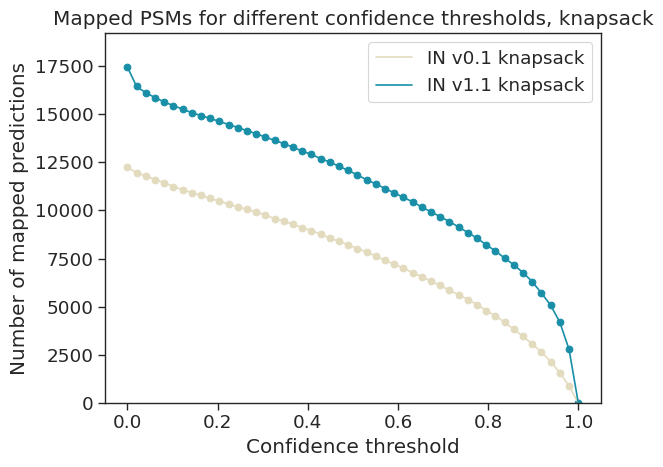

In [37]:
# same plot without greedy
plt.plot(confidence_thresholds, mapped_old_knap, label='IN v0.1 knapsack', color=color_dict['old_knapsack'])
plt.plot(confidence_thresholds, mapped_new_knap, label='IN v1.1 knapsack', color=color_dict['new_knapsack'])
plt.scatter(confidence_thresholds, mapped_old_knap, color=color_dict['old_knapsack'])
plt.scatter(confidence_thresholds, mapped_new_knap, color=color_dict['new_knapsack'])
plt.ylim(0, max(max(mapped_old_knap), max(mapped_new_knap)) * 1.1)

plt.xlabel('Confidence threshold')
plt.ylabel('Number of mapped predictions')
plt.legend()
plt.title('Mapped PSMs for different confidence thresholds, knapsack')

Text(0.5, 1.0, 'Unmapped PSMs for different confidence thresholds')

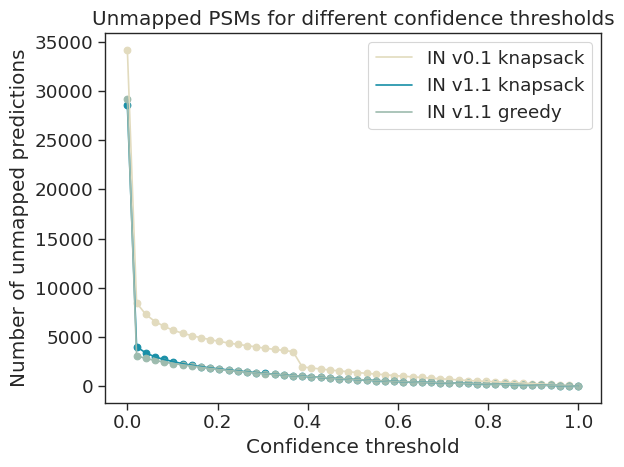

In [38]:
# translate above code to our data
unmapped_old_knap = []
unmapped_new_knap = []
unmapped_new_greedy = []
for threshold in confidence_thresholds:
    unmatched_old_knapsack = final[(final["confidence_old_knapsack"] > threshold) & (final.protein_id.isna())]
    unmatched_new_knapsack = final[(final["confidence_new_knapsack"] > threshold) & (final.protein_id_new_knapsack.isna())]
    unmatched_new_greedy = final[(final["confidence_new_greedy"] > threshold) & (final.protein_id_new_greedy.isna())]
    unmapped_old_knap.append(unmatched_old_knapsack.shape[0])
    unmapped_new_knap.append(unmatched_new_knapsack.shape[0])
    unmapped_new_greedy.append(unmatched_new_greedy.shape[0])

plt.plot(confidence_thresholds, unmapped_old_knap, label='IN v0.1 knapsack', color=color_dict['old_knapsack'])
plt.plot(confidence_thresholds, unmapped_new_knap, label='IN v1.1 knapsack', color=color_dict['new_knapsack'])
plt.plot(confidence_thresholds, unmapped_new_greedy, label='IN v1.1 greedy', color=color_dict['new_greedy'])
plt.scatter(confidence_thresholds, unmapped_old_knap, color=color_dict['old_knapsack'])
plt.scatter(confidence_thresholds, unmapped_new_knap, color=color_dict['new_knapsack'])
plt.scatter(confidence_thresholds, unmapped_new_greedy, color=color_dict['new_greedy'])

plt.xlabel('Confidence threshold')
plt.ylabel('Number of unmapped predictions')
plt.legend()
plt.title('Unmapped PSMs for different confidence thresholds')

Text(0.5, 1.0, 'Unmapped PSMs for different confidence thresholds, knapsack')

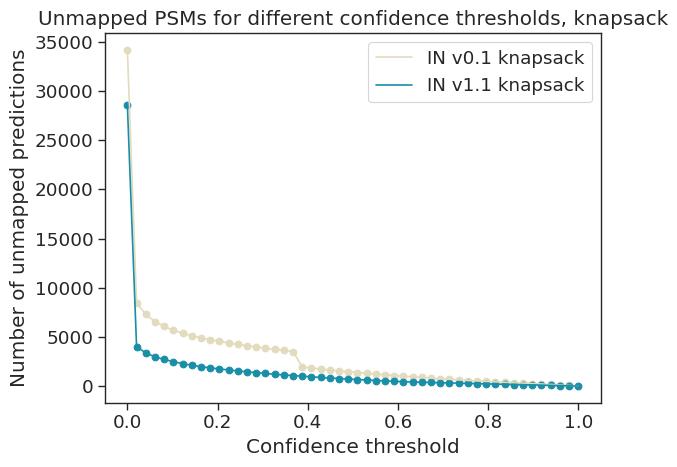

In [39]:
# same plot without greedy
plt.plot(confidence_thresholds, unmapped_old_knap, label='IN v0.1 knapsack', color=color_dict['old_knapsack'])
plt.plot(confidence_thresholds, unmapped_new_knap, label='IN v1.1 knapsack', color=color_dict['new_knapsack'])
plt.scatter(confidence_thresholds, unmapped_old_knap, color=color_dict['old_knapsack'])
plt.scatter(confidence_thresholds, unmapped_new_knap, color=color_dict['new_knapsack'])

plt.xlabel('Confidence threshold')
plt.ylabel('Number of unmapped predictions')
plt.legend()

plt.title('Unmapped PSMs for different confidence thresholds, knapsack')


In [40]:
# get ratio of mapped to unmapped for old knapsack
mapped_unmapped_old_knap = np.array(mapped_old_knap) / np.array(unmapped_old_knap)
mapped_unmapped_new_knap = np.array(mapped_new_knap) / np.array(unmapped_new_knap)
mapped_unmapped_new_greedy = np.array(mapped_new_greedy) / np.array(unmapped_new_greedy)

/tmp/ipykernel_97698/2851439502.py:2: RuntimeWarning: invalid value encountered in divide
  mapped_unmapped_old_knap = np.array(mapped_old_knap) / np.array(unmapped_old_knap)
/tmp/ipykernel_97698/2851439502.py:3: RuntimeWarning: invalid value encountered in divide
  mapped_unmapped_new_knap = np.array(mapped_new_knap) / np.array(unmapped_new_knap)
/tmp/ipykernel_97698/2851439502.py:4: RuntimeWarning: invalid value encountered in divide
  mapped_unmapped_new_greedy = np.array(mapped_new_greedy) / np.array(unmapped_new_greedy)


/tmp/ipykernel_97698/2215534272.py:2: RuntimeWarning: invalid value encountered in divide
  ratio_old = np.array(mapped_old_knap) / np.array(unmapped_old_knap)
/tmp/ipykernel_97698/2215534272.py:3: RuntimeWarning: invalid value encountered in divide
  ratio_new = np.array(mapped_new_knap) / np.array(unmapped_new_knap)
/tmp/ipykernel_97698/2215534272.py:4: RuntimeWarning: invalid value encountered in divide
  ratio_greedy = np.array(mapped_new_greedy) / np.array(unmapped_new_greedy)


Text(0.5, 1.0, 'Mapped to unmapped ratio for different confidence thresholds')

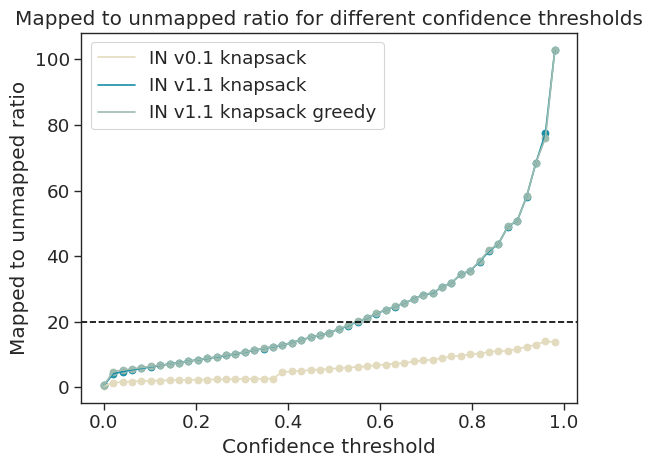

In [41]:
# translate above code to our data
ratio_old = np.array(mapped_old_knap) / np.array(unmapped_old_knap)
ratio_new = np.array(mapped_new_knap) / np.array(unmapped_new_knap)
ratio_greedy = np.array(mapped_new_greedy) / np.array(unmapped_new_greedy)

plt.plot(confidence_thresholds, ratio_old, label='IN v0.1 knapsack', color=color_dict['old_knapsack'])
plt.plot(confidence_thresholds, ratio_new, label='IN v1.1 knapsack', color=color_dict['new_knapsack'])
plt.plot(confidence_thresholds, ratio_greedy, label='IN v1.1 knapsack greedy', color=color_dict['new_greedy'])
plt.scatter(confidence_thresholds, ratio_old, color=color_dict['old_knapsack'])
plt.scatter(confidence_thresholds, ratio_new, color=color_dict['new_knapsack'])
plt.scatter(confidence_thresholds, ratio_greedy, color=color_dict['new_greedy'])

# create a dash line at y ratio of 20
plt.axhline(y=20, color='black', linestyle='--')

plt.xlabel('Confidence threshold')
plt.ylabel('Mapped to unmapped ratio')
plt.legend()
plt.title('Mapped to unmapped ratio for different confidence thresholds')

Additionally, when comparing the ratio of mapped to unmapped predictions, IN v1.1 demonstrates a considerable reduction in false positive rates (dashed line indicates 5% FDR when directly mapping to proteome without database grounding).

/tmp/ipykernel_97698/1431655129.py:2: RuntimeWarning: invalid value encountered in divide
  ratio_old = np.array(mapped_old_knap) / np.array(unmapped_old_knap)
/tmp/ipykernel_97698/1431655129.py:3: RuntimeWarning: invalid value encountered in divide
  ratio_new = np.array(mapped_new_knap) / np.array(unmapped_new_knap)


Text(0.5, 1.0, 'Mapped to unmapped ratio for different confidence thresholds')

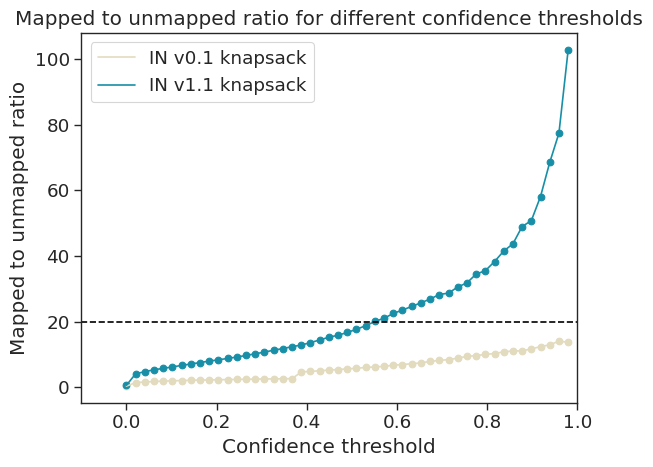

In [42]:
# translate above code to our data
ratio_old = np.array(mapped_old_knap) / np.array(unmapped_old_knap)
ratio_new = np.array(mapped_new_knap) / np.array(unmapped_new_knap)

plt.plot(confidence_thresholds, ratio_old, label='IN v0.1 knapsack', color=color_dict['old_knapsack'])
plt.plot(confidence_thresholds, ratio_new, label='IN v1.1 knapsack', color=color_dict['new_knapsack'])
plt.scatter(confidence_thresholds, ratio_old, color=color_dict['old_knapsack'])
plt.scatter(confidence_thresholds, ratio_new, color=color_dict['new_knapsack'])

# create a dash line at y ratio of 20
plt.axhline(y=20, color='black', linestyle='--')
plt.xlim(-0.1, 1)

plt.xlabel('Confidence threshold')
plt.ylabel('Mapped to unmapped ratio')
plt.legend()
plt.title('Mapped to unmapped ratio for different confidence thresholds')

In [43]:
matched_new_knapsack = final[(final["confidence_new_knapsack"] > confidence_threshold_new_knapsack) & (final.protein_id_new_knapsack.notna())]
unmatched_new_knapsack = final[(final["confidence_new_knapsack"] > confidence_threshold_new_knapsack) & (final.protein_id_new_knapsack.isna())]

matched_new_greedy = final[(final["confidence_new_greedy"] > confidence_threshold_new_greedy) & (final.protein_id_new_greedy.notna())]
unmatched_new_greedy = final[(final["confidence_new_greedy"] > confidence_threshold_new_greedy) & (final.protein_id_new_greedy.isna())]

matched_old_knapsack = final[(final["confidence_old_knapsack"] > confidence_threshold_old_knapsack) & (final.protein_id.notna())]
unmatched_old_knapsack = final[(final["confidence_old_knapsack"] > confidence_threshold_old_knapsack) & (final.protein_id.isna())]

Due to this higher discrimination of false positives and PSMs in the model confidence scale, IN v1.1 identifies 145.1% more peptides mapping to the proteome at 5% FDR compared to its precursor, leading to a 35.3% increase in protein identifications with the same threshold 

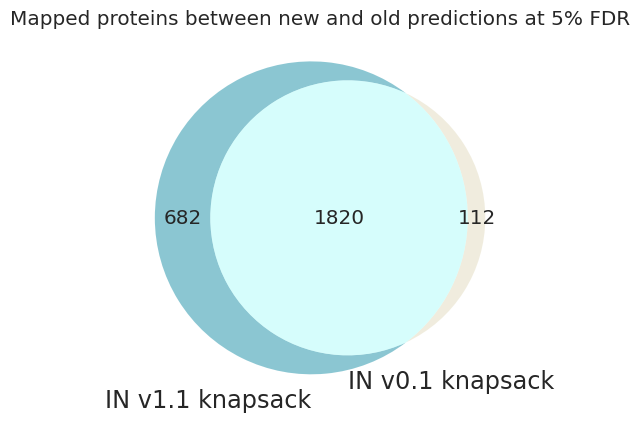

In [44]:
# create venn diagram for mapped proteins
venn2([get_proteins(matched_new_knapsack, "protein_id_new_knapsack"), get_proteins(matched_old_knapsack, "protein_id")], set_labels=('IN v1.1 knapsack', 'IN v0.1 knapsack'), set_colors=(color_dict['new_knapsack'], color_dict['old_knapsack']), alpha=0.5)
plt.title(f'Mapped proteins between new and old predictions at 5% FDR')
plt.show()

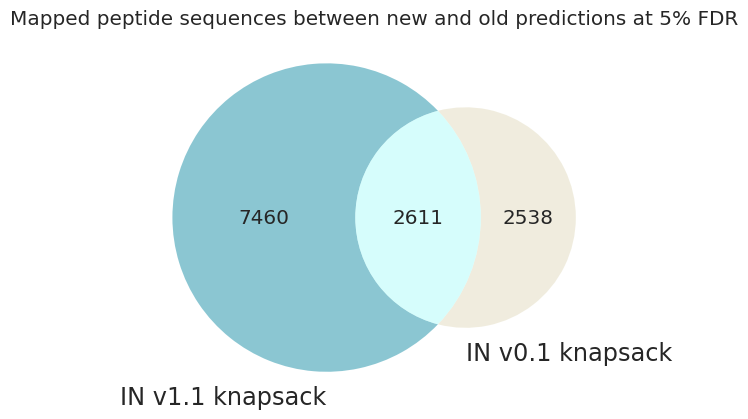

In [45]:
# do the same for unique peptide sequences
venn2([set(matched_new_knapsack.preds_new_knapsack), set(matched_old_knapsack.preds)], set_labels=('IN v1.1 knapsack', 'IN v0.1 knapsack'), set_colors=(color_dict['new_knapsack'], color_dict['old_knapsack']), alpha=0.5)
plt.title('Mapped peptide sequences between new and old predictions at 5% FDR')
plt.show()

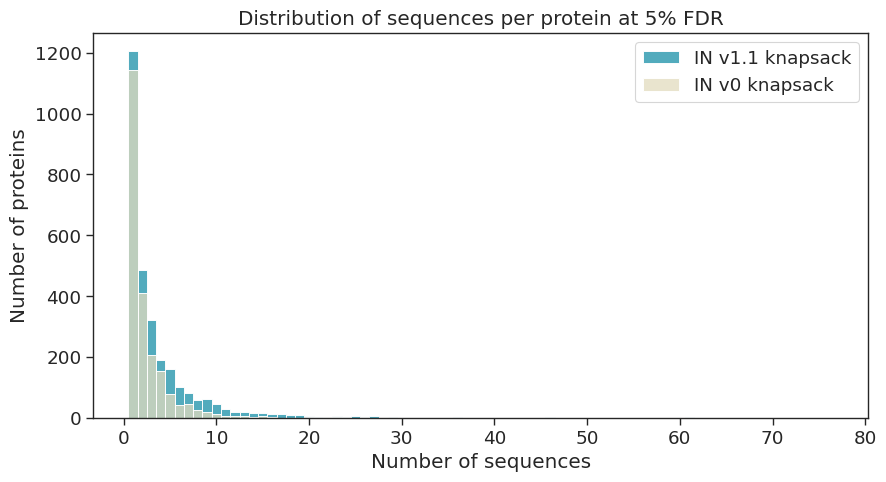

In [46]:
# protein counts for old and new knapsack in the same plot
plt.figure(figsize=(10, 5))
sns.histplot(matched_new_knapsack.groupby('protein_id_new_knapsack').count().preds, discrete=True, color=color_dict['new_knapsack'], label='IN v1.1 knapsack')
sns.histplot(matched_old_knapsack.groupby('protein_id').count().preds, discrete=True, color=color_dict['old_knapsack'], label='IN v0 knapsack')
plt.title('Distribution of sequences per protein at 5% FDR')
plt.xlabel('Number of sequences')
plt.ylabel('Number of proteins')
plt.legend()
plt.show()


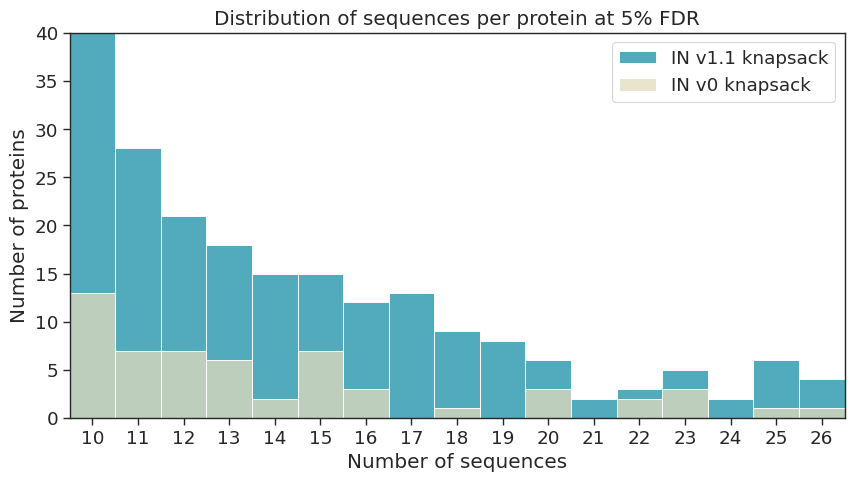

In [47]:
# same plot but zoom in the range of 10 to 30
plt.figure(figsize=(10, 5))
sns.histplot(matched_new_knapsack.groupby('protein_id_new_knapsack').count().preds, discrete=True, color=color_dict['new_knapsack'], label='IN v1.1 knapsack')
sns.histplot(matched_old_knapsack.groupby('protein_id').count().preds, discrete=True, color=color_dict['old_knapsack'], label='IN v0 knapsack')
plt.title('Distribution of sequences per protein at 5% FDR')
plt.xlabel('Number of sequences')
plt.ylabel('Number of proteins')
plt.legend()
plt.xlim(9.5, 26.5)
plt.ylim(0, 40)
plt.xticks(range(10, 27))
plt.show()

In [48]:
# filter predictions to mapped and unmapped reads, higher than XX% confidence
prediction_confidence_threshold = 0.0

matched_new_knapsack = final[(final["confidence_new_knapsack"] > prediction_confidence_threshold) & (final["protein_id_new_knapsack"].notna())]
unmatched_new_predictions = final[(final["confidence_new_knapsack"] > prediction_confidence_threshold) & (final["protein_id_new_knapsack"].isna())]

print(f"New Mapped predictions labeled shape: {matched_new_knapsack.shape}")
print(f"New Unmapped predictions labeled shape: {unmatched_new_knapsack.shape}")

matched_old_knapsack = final[(final["confidence_old_knapsack"] > prediction_confidence_threshold) & (final["protein_id"].notna())]
unmatched_old_predictions = final[(final["confidence_old_knapsack"] > prediction_confidence_threshold) & (final["protein_id"].isna())]

print(f"Old Mapped predictions labeled shape: {matched_old_knapsack.shape}")
print(f"Old Unmapped predictions labeled shape: {unmatched_old_knapsack.shape}")

matched_new_greedy = final[(final["confidence_new_greedy"] > prediction_confidence_threshold) & (final["protein_id_new_greedy"].notna())]
unmatched_new_greedy = final[(final["confidence_new_greedy"] > prediction_confidence_threshold) & (final["protein_id_new_greedy"].isna())]

print(f"New Greedy Mapped predictions labeled shape: {matched_new_greedy.shape}")
print(f"New Greedy Unmapped predictions labeled shape: {unmatched_new_greedy.shape}")

New Mapped predictions labeled shape: (17453, 83)
New Unmapped predictions labeled shape: (583, 83)
Old Mapped predictions labeled shape: (12237, 83)
Old Unmapped predictions labeled shape: (592, 83)
New Greedy Mapped predictions labeled shape: (17254, 83)
New Greedy Unmapped predictions labeled shape: (29155, 83)


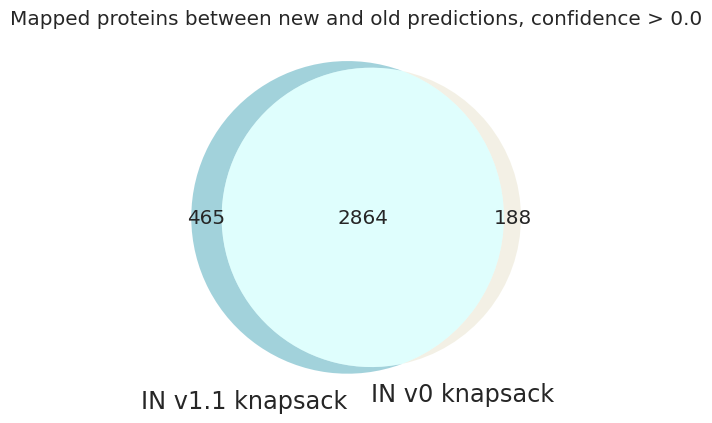

In [49]:
# create venn diagram for mapped proteins
venn2([get_proteins(matched_new_knapsack, "protein_id_new_knapsack"), get_proteins(matched_old_knapsack, "protein_id")], set_labels=('IN v1.1 knapsack', 'IN v0 knapsack'), set_colors=(color_dict['new_knapsack'], color_dict['old_knapsack']))
plt.title('Mapped proteins between new and old predictions, confidence > 0.0')
plt.show()

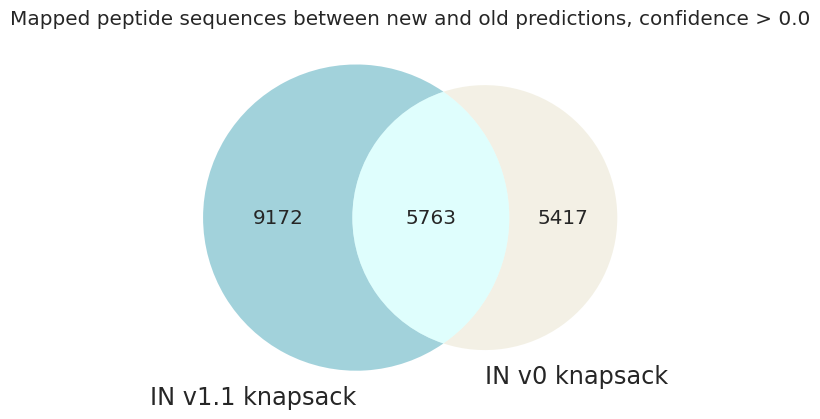

In [50]:
# do the same for unique peptide sequences
venn2([set(matched_new_knapsack.preds_new_knapsack), set(matched_old_knapsack.preds)], set_labels=('IN v1.1 knapsack', 'IN v0 knapsack'), set_colors=(color_dict['new_knapsack'], color_dict['old_knapsack']))
plt.title('Mapped peptide sequences between new and old predictions, confidence > 0.0')
plt.show()

## Expanded modification support, features and runtime

The IN v1.1 release introduces compatibility with four additional modifications: phosphorylation, deamidation, carbamylation, and ammonia loss. Carbamidomethylation is now a variable modification, with variable acetylation and oxidation also supported. This results in an increase in overall peptide sequence predictions.


In [51]:
# count unique number of modifications for old and new knapsack
unique_mods_old = set()

for seq in final.mod_preds:
    if isinstance(seq, str):
        res = re.findall(r'\([a-zA-Z]+\)', seq)  # Find all modifications in parentheses
        unique_mods_old.update(res)  # Add all found modifications to the set

# unique_mods_old.add('(carbamidomethyl)')  # Add fixed modification to the set
print(unique_mods_old)

{'(ox)'}


In [52]:
# do the same for new knapsack
unique_mods_new = set()

for seq in final.mod_preds_new_knapsack:  # Assuming this is your dataframe column
    if isinstance(seq, str):
        res = re.findall(r'\[UNIMOD:\d+\]', seq)  # Find all modifications in brackets
        unique_mods_new.update(res)  # Add all found modifications to the set

print(unique_mods_new)

{'[UNIMOD:385]', '[UNIMOD:7]', '[UNIMOD:5]', '[UNIMOD:35]', '[UNIMOD:4]', '[UNIMOD:1]', '[UNIMOD:21]'}


In [53]:
mapping = {'[UNIMOD:1]': 'Acetylation', '[UNIMOD:21]': 'Phosphorylation', '[UNIMOD:4]': 'Carbamidomethyl', '[UNIMOD:35]': 'Oxidation', '[UNIMOD:7]': 'Deamidation', '[UNIMOD:385]': 'Ammonia loss', '[UNIMOD:5]': 'Carbamylation'}
print(len(mapping))

7


In [54]:
unique_mods_new.remove('[UNIMOD:4]')
unique_mods_new.remove('[UNIMOD:5]')

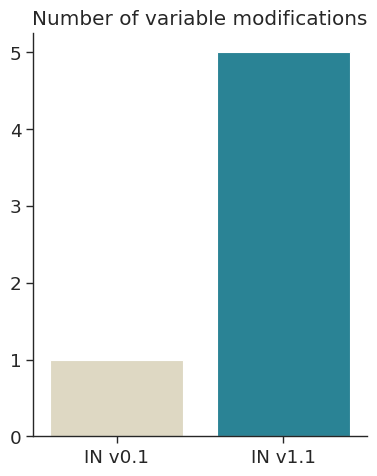

In [55]:
# plot number of unique modifications for old and new knapsack
plt.figure(figsize=(4, 5))
sns.barplot(x=['IN v0.1', 'IN v1.1'], y=[len(unique_mods_old), len(unique_mods_new)], palette=[color_dict['old_knapsack'], color_dict['new_knapsack']])
plt.title('Number of variable modifications')
plt.tight_layout()
sns.despine()

In [56]:
# number of peptides with variable modifications for old and new knapsack
peptides_with_mods_old = set()
for seq in final.mod_preds:
    if isinstance(seq, str):
        for mod in unique_mods_old:
            if mod in seq:
                peptides_with_mods_old.add(seq)
                break

len(peptides_with_mods_old)

2612

In [57]:
# number of peptides with variable modifications for new knapsack
peptides_with_mods_new = set()
individual_mods_dict = {}
for seq in final.mod_preds_new_knapsack:
    if isinstance(seq, str):
        for mod in unique_mods_new:
            if mod in seq:
                peptides_with_mods_new.add(seq)
                break
        for mod in unique_mods_new:
            if mod in seq:
                individual_mods_dict[mod] = individual_mods_dict.get(mod, 0) + 1

len(peptides_with_mods_new)

8723

In [58]:
print(individual_mods_dict)

{'[UNIMOD:21]': 3580, '[UNIMOD:1]': 2276, '[UNIMOD:35]': 2620, '[UNIMOD:7]': 869, '[UNIMOD:385]': 5}


In [59]:
# variable modifications for new greedy
peptides_with_mods_greedy = set()

for seq in final.mod_preds_new_greedy:
    if isinstance(seq, str):
        for mod in unique_mods_new:
            if mod in seq:
                peptides_with_mods_greedy.add(seq)
                break

len(peptides_with_mods_greedy)

5643

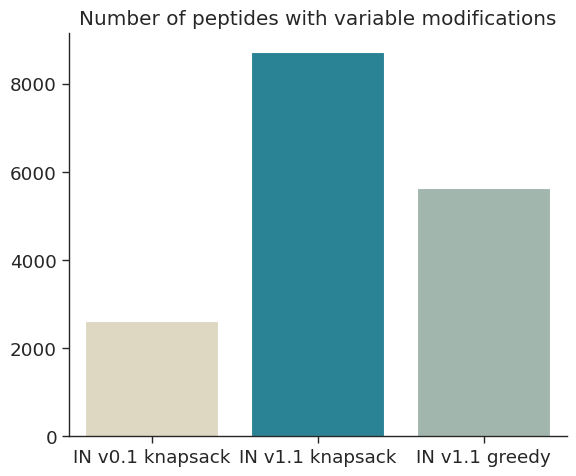

In [60]:
# plot number of peptides with variable modifications for old and new knapsack and new greedy
plt.figure(figsize=(6, 5))
sns.barplot(x=['IN v0.1 knapsack', 'IN v1.1 knapsack', 'IN v1.1 greedy'], y=[len(peptides_with_mods_old), len(peptides_with_mods_new), len(peptides_with_mods_greedy)], palette=[color_dict['old_knapsack'], color_dict['new_knapsack'], color_dict['new_greedy']])
plt.title('Number of peptides with variable modifications')
plt.tight_layout()
sns.despine()

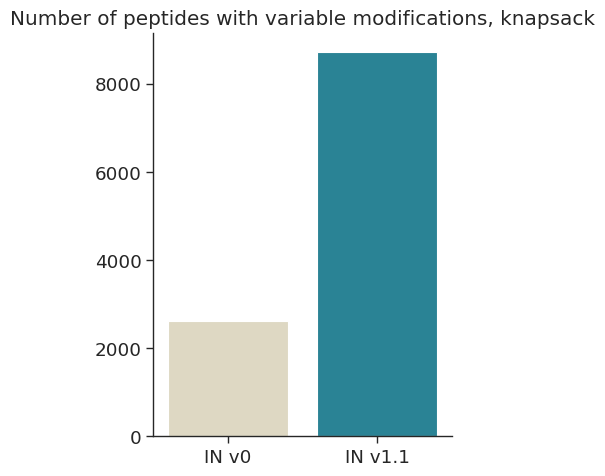

In [61]:
# plot number of peptides with variable modifications for old and new knapsack
plt.figure(figsize=(4, 5))
sns.barplot(x=['IN v0', 'IN v1.1'], y=[len(peptides_with_mods_old), len(peptides_with_mods_new)], palette=[color_dict['old_knapsack'], color_dict['new_knapsack']])
plt.title('Number of peptides with variable modifications, knapsack')
plt.tight_layout()
sns.despine()


In [62]:
# calculate number of peptides with variable modifications above the 5% FDR threshold for old and new knapsack and new greedy
peptides_with_mods_old_fdr = set()
for seq in final.mod_preds[final.confidence_old_knapsack >= confidence_threshold_old_knapsack]:
    if isinstance(seq, str):
        for mod in unique_mods_old:
            if mod in seq:
                peptides_with_mods_old_fdr.add(seq)
                break

peptides_with_mods_new_fdr = set()
for seq in final.mod_preds_new_knapsack[final.confidence_new_knapsack >= confidence_threshold_new_knapsack]:
    if isinstance(seq, str):
        for mod in unique_mods_new:
            if mod in seq:
                peptides_with_mods_new_fdr.add(seq)
                break

peptides_with_mods_greedy_fdr = set()
for seq in final.mod_preds_new_greedy[final.confidence_new_greedy >= confidence_threshold_new_greedy]:
    if isinstance(seq, str):
        for mod in unique_mods_new:
            if mod in seq:
                peptides_with_mods_greedy_fdr.add(seq)
                break

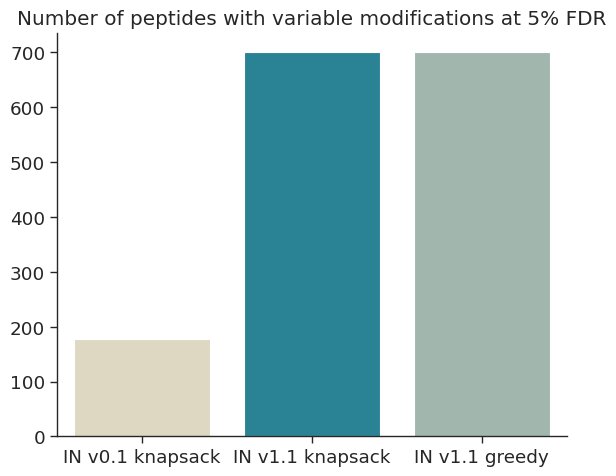

In [63]:
# plot number of peptides with variable modifications above the 5% FDR threshold for old and new knapsack and new greedy
plt.figure(figsize=(6, 5))
sns.barplot(x=['IN v0.1 knapsack', 'IN v1.1 knapsack', 'IN v1.1 greedy'], y=[len(peptides_with_mods_old_fdr), len(peptides_with_mods_new_fdr), len(peptides_with_mods_greedy_fdr)], palette=[color_dict['old_knapsack'], color_dict['new_knapsack'], color_dict['new_greedy']])
plt.title('Number of peptides with variable modifications at 5% FDR')
plt.tight_layout()
sns.despine()

We see a substantial number of high confidence predictions at 5% FDR, even in samples without enrichment.

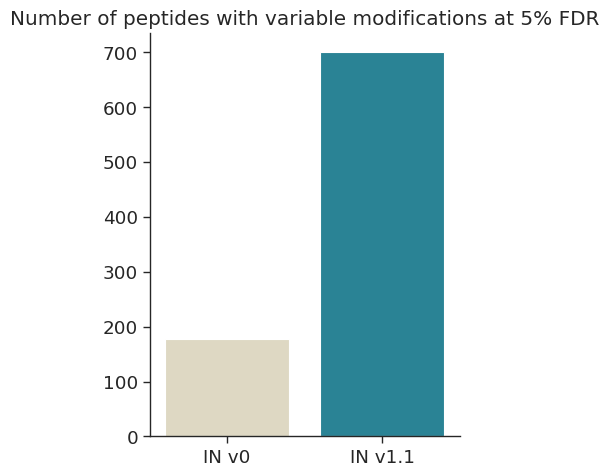

In [64]:
# plot number of peptides with variable modifications above the 5% FDR threshold for old and new knapsack
plt.figure(figsize=(4, 5))
sns.barplot(x=['IN v0', 'IN v1.1'], y=[len(peptides_with_mods_old_fdr), len(peptides_with_mods_new_fdr)], palette=[color_dict['old_knapsack'], color_dict['new_knapsack']])
plt.title('Number of peptides with variable modifications at 5% FDR')
plt.tight_layout()
sns.despine()

For large datasets, especially when prioritising high-confidence results, there is a tradeoff between performance and inference time. Despite linear scaling, knapsack precursor fit takes 36 times longer than greedy precursor fit per spectrum. While knapsack beam search provides the best performance, it comes at a steep computational cost. In many cases, running the model with greedy precursor mass search may be more efficient while still delivering robust results.

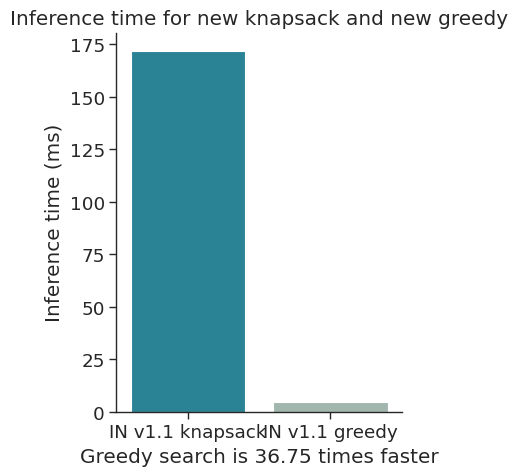

In [65]:
# plot inference times for new knapsack and new greedy
inference_time_new_knapsack = 172
inference_time_new_greedy = 4.68

ratio = inference_time_new_knapsack / inference_time_new_greedy

plt.figure(figsize=(4, 5))
sns.barplot(x=['IN v1.1 knapsack', 'IN v1.1 greedy'], y=[inference_time_new_knapsack, inference_time_new_greedy], palette=[color_dict['new_knapsack'], color_dict['new_greedy']])
plt.ylabel('Inference time (ms)')
plt.title('Inference time for new knapsack and new greedy')
plt.xlabel(f'Greedy search is {ratio:.2f} times faster')
plt.tight_layout()
sns.despine()

In [66]:
unique_mods_new

{'[UNIMOD:1]', '[UNIMOD:21]', '[UNIMOD:35]', '[UNIMOD:385]', '[UNIMOD:7]'}

In [67]:
# annotate column with mod or no mod
final['mod_knapsack_old'] = np.nan
final['mod_knapsack_new'] = np.nan
final['mod_greedy'] = np.nan

for i, row in final.iterrows():
    for mod in unique_mods_old:
        if isinstance(row['mod_preds'], str):
            if mod in row['mod_preds']:
                final.at[i, 'mod_knapsack_old'] = 'mod'
                break
            else:
                final.at[i, 'mod_knapsack_old'] = 'no mod'
    for mod in unique_mods_new:
        if isinstance(row['mod_preds_new_knapsack'], str):
            if mod in row['mod_preds_new_knapsack']:
                final.at[i, 'mod_knapsack_new'] = 'mod'
                break
            else:
                final.at[i, 'mod_knapsack_new'] = 'no mod'
    for mod in unique_mods_new:
        if isinstance(row['mod_preds_new_greedy'], str):
            if mod in row['mod_preds_new_greedy']:
                final.at[i, 'mod_greedy'] = 'mod'
                break
            else:
                final.at[i, 'mod_greedy'] = 'no mod'

In [68]:
# find number of peptides with variable modifications for old and new knapsack and new greedy that map to the proteome
psms_old_knapsack_mod = final[(final['mod_knapsack_old'] == 'mod') & (final['preds'] == final['stripped_target'])].shape[0]
psms_new_knapsack_mod = final[(final['mod_knapsack_new'] == 'mod') & (final['protein_id_new_knapsack'].notna())].shape[0]
psms_new_greedy_mod = final[(final['mod_greedy'] == 'mod') & (final['protein_id_new_greedy'].notna())].shape[0]

print(f'Old Knapsack: {psms_old_knapsack_mod} PSMs with variable modifications')
print(f'New Knapsack: {psms_new_knapsack_mod} PSMs with variable modifications')
print(f'New Greedy: {psms_new_greedy_mod} PSMs with variable modifications')

Old Knapsack: 311 PSMs with variable modifications
New Knapsack: 1437 PSMs with variable modifications
New Greedy: 1142 PSMs with variable modifications


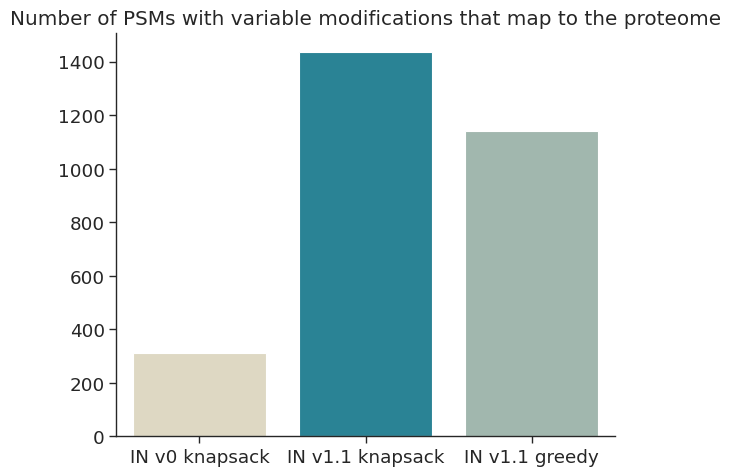

In [69]:
# plot number of peptides with variable modifications for old and new knapsack and new greedy that map to the proteome
plt.figure(figsize=(6, 5))
sns.barplot(x=['IN v0 knapsack', 'IN v1.1 knapsack', 'IN v1.1 greedy'], y=[psms_old_knapsack_mod, psms_new_knapsack_mod, psms_new_greedy_mod], palette=[color_dict['old_knapsack'], color_dict['new_knapsack'], color_dict['new_greedy']])
plt.title('Number of PSMs with variable modifications that map to the proteome')
plt.tight_layout()
sns.despine()

In [70]:
# do the same for 5% FDR
psms_old_knapsack_mod_fdr = final[(final['mod_knapsack_old'] == 'mod') & (final['preds'] == final['stripped_target']) & (final['confidence_old_knapsack'] >= confidence_threshold_old_knapsack)].shape[0]
psms_new_knapsack_mod_fdr = final[(final['mod_knapsack_new'] == 'mod') & (final['protein_id_new_knapsack'].notna()) & (final['confidence_new_knapsack'] >= confidence_threshold_new_knapsack)].shape[0]
psms_new_greedy_mod_fdr = final[(final['mod_greedy'] == 'mod') & (final['protein_id_new_greedy'].notna()) & (final['confidence_new_greedy'] >= confidence_threshold_new_greedy)].shape[0]

print(f'Old Knapsack: {psms_old_knapsack_mod_fdr} PSMs with variable modifications at 5% FDR')
print(f'New Knapsack: {psms_new_knapsack_mod_fdr} PSMs with variable modifications at 5% FDR')
print(f'New Greedy: {psms_new_greedy_mod_fdr} PSMs with variable modifications at 5% FDR')

Old Knapsack: 140 PSMs with variable modifications at 5% FDR
New Knapsack: 724 PSMs with variable modifications at 5% FDR
New Greedy: 725 PSMs with variable modifications at 5% FDR


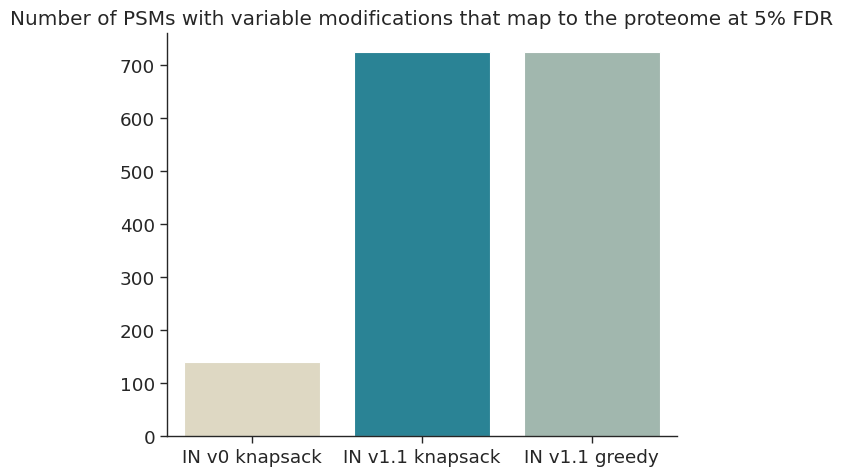

In [71]:
# plot number of peptides with variable modifications for old and new knapsack and new greedy that map to the proteome at 5% FDR
plt.figure(figsize=(6, 5))
sns.barplot(x=['IN v0 knapsack', 'IN v1.1 knapsack', 'IN v1.1 greedy'], y=[psms_old_knapsack_mod_fdr, psms_new_knapsack_mod_fdr, psms_new_greedy_mod_fdr], palette=[color_dict['old_knapsack'], color_dict['new_knapsack'], color_dict['new_greedy']])
plt.title('Number of PSMs with variable modifications that map to the proteome at 5% FDR')
plt.tight_layout()
sns.despine()

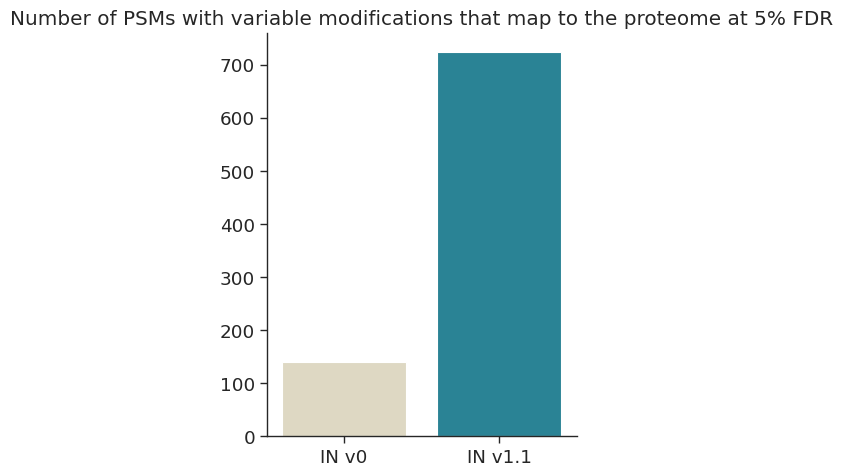

In [72]:
# do the same without greedy
plt.figure(figsize=(4, 5))
sns.barplot(x=['IN v0', 'IN v1.1'], y=[psms_old_knapsack_mod_fdr, psms_new_knapsack_mod_fdr], palette=[color_dict['old_knapsack'], color_dict['new_knapsack']])
plt.title('Number of PSMs with variable modifications that map to the proteome at 5% FDR')
plt.tight_layout()
sns.despine()

In the updated version, a spectrum dataframe class has been introduced to further improve data import robustness and interoperability. Residue log probabilities are now included in the results alongside the token list, and scan number and precursor mass error (in ppm) are now also included in the output table. The model also supports evaluation mode with a database search reference, where FDR confidence thresholds are automatically reported during inference. In the new model, leucine and isoleucine are predicted as separate residue tokens, albeit with relatively low recall at peptide level (17.7% for leucine and 19.6% for isoleucine).

In [73]:
# evaluate recall in PSMs with isoleucine and leucine
# get all PSMs with isoleucine and leucine
psms_with_il_new_knapsack = final[(final['preds_new_knapsack'].str.contains('I')) | (final['preds_new_knapsack'].str.contains('L'))].shape[0]
psms_with_il_new_greedy = final[(final['preds_new_greedy'].str.contains('I')) | (final['preds_new_greedy'].str.contains('L'))].shape[0]

# get all PSMs with isoleucine and leucine that have targets
psms_with_i_target_new_knapsack = final[(final['preds_new_knapsack'].str.contains('I')) & (final['sequence'].notna())].shape[0]
psms_with_i_target_new_greedy = final[(final['preds_new_greedy'].str.contains('I')) & (final['sequence'].notna())].shape[0]

print(f'New knapsack: {psms_with_i_target_new_knapsack} PSMs with isoleucine and leucine')
print(f'New greedy: {psms_with_i_target_new_greedy} PSMs with isoleucine and leucine')

# get all PSMs with isoleucine and leucine that have targets and are correct
psms_with_i_target_correct_new_knapsack = final[(final['preds_new_knapsack'].str.contains('I')) & (final['sequence'].notna()) & (final['preds_new_knapsack'] == final['sequence'])].shape[0]
psms_with_i_target_correct_new_greedy = final[(final['preds_new_greedy'].str.contains('I')) & (final['sequence'].notna()) & (final['preds_new_greedy'] == final['sequence'])].shape[0]

print(f'New knapsack: {psms_with_i_target_correct_new_knapsack} PSMs with isoleucine and leucine that are correct')
print(f'New greedy: {psms_with_i_target_correct_new_greedy} PSMs with isoleucine and leucine that are correct')

# calculate recall
recall_new_knapsack = psms_with_i_target_correct_new_knapsack / psms_with_i_target_new_knapsack
recall_new_greedy = psms_with_i_target_correct_new_greedy / psms_with_i_target_new_greedy

print(f'Recall for IN v1.1 knapsack: {recall_new_knapsack:.3f}')
print(f'Recall for IN v1.1 greedy: {recall_new_greedy:.3f}')

New knapsack: 19774 PSMs with isoleucine and leucine
New greedy: 19282 PSMs with isoleucine and leucine
New knapsack: 3883 PSMs with isoleucine and leucine that are correct
New greedy: 3548 PSMs with isoleucine and leucine that are correct
Recall for IN v1.1 knapsack: 0.196
Recall for IN v1.1 greedy: 0.184


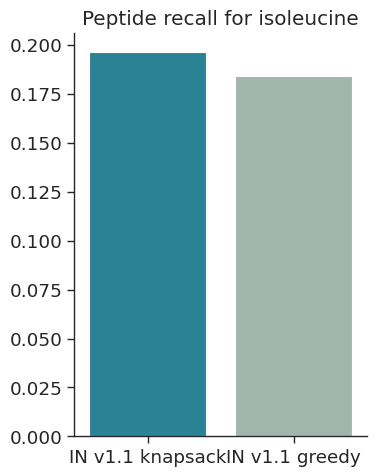

In [74]:
# plot both recalls for both amino acids for new knapsack and new greedy
plt.figure(figsize=(4, 5))
sns.barplot(x=['IN v1.1 knapsack', 'IN v1.1 greedy'], y=[recall_new_knapsack, recall_new_greedy], palette=[color_dict['new_knapsack'], color_dict['new_greedy']])
plt.title('Peptide recall for isoleucine')
plt.tight_layout()
sns.despine()

In [75]:
# do the same for leucine
psms_with_l_target_new_knapsack = final[(final['preds_new_knapsack'].str.contains('L')) & (final['sequence'].notna())].shape[0]
psms_with_l_target_new_greedy = final[(final['preds_new_greedy'].str.contains('L')) & (final['sequence'].notna())].shape[0]

psms_with_l_target_correct_new_knapsack = final[(final['preds_new_knapsack'].str.contains('L')) & (final['sequence'].notna()) & (final['preds_new_knapsack'] == final['sequence'])].shape[0]
psms_with_l_target_correct_new_greedy = final[(final['preds_new_greedy'].str.contains('L')) & (final['sequence'].notna()) & (final['preds_new_greedy'] == final['sequence'])].shape[0]

recall_new_knapsack = psms_with_l_target_correct_new_knapsack / psms_with_l_target_new_knapsack
recall_new_greedy = psms_with_l_target_correct_new_greedy / psms_with_l_target_new_greedy

print(f'Recall for IN v1.1 knapsack: {recall_new_knapsack:.3f}')
print(f'Recall for IN v1.1 greedy: {recall_new_greedy:.3f}')

Recall for IN v1.1 knapsack: 0.177
Recall for IN v1.1 greedy: 0.164


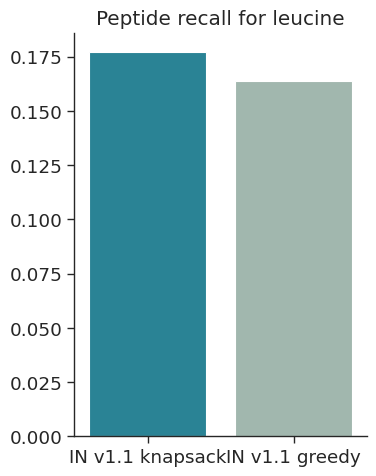

In [76]:
# plot both recalls for both amino acids for new knapsack and new greedy
plt.figure(figsize=(4, 5))
sns.barplot(x=['IN v1.1 knapsack', 'IN v1.1 greedy'], y=[recall_new_knapsack, recall_new_greedy], palette=[color_dict['new_knapsack'], color_dict['new_greedy']])
plt.title('Peptide recall for leucine')
plt.tight_layout()
sns.despine()

Although here we focus on a single dataset, we have observed similar performance gains across biological samples and applications, indicating generalized gains. Importantly, we observe an impressive 81.3% peptide recall in our GluC dataset, which is a GluC pretreated HeLa proteome with more data than the HeLa QC above.

We believe our models continue to improve in performance, and we have yet to determine the upper limit for database search recall and novel identification rates. Our ultimate goal is to achieve robust accuracy near the 90% recall mark across experimental datasets, edging closer to solving de novo peptide sequencing. We will continue to scale and refine our models, as well as explore biological applications and features further. Additionally, the next generation of IN+, our diffusion model, is being trained and will be soon released in a similar post. 

So stay tuned for more updates, several preprints coming out soon! 

Original research paper available at: [InstaNovo enables diffusion-powered de novo peptide sequencing in large-scale proteomics experiments](https://www.nature.com/articles/s42256-025-01019-5)